# ReneWind

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.). 



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 40000 observations in the training set and 10000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generator could be repaired before failing/breaking to reduce the maintenance cost. The different costs associated with maintenance are as follows:

- `Replacement cost = $40,000`
- `Repair cost = $15,000`
- `Inspection cost = $5,000`

“1” in the target variables should be considered as “failure” and “0” will represent “No failure”.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models. 
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

## Importing libraries

In [7]:
# This will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)
from sklearn import metrics

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To suppress warnings
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

## Loading Data

In [8]:
# Importing the training dataset
df = pd.read_csv(
    r"C:\Users\igorm\OneDrive\Desktop\CAREER_DS_BIG DATA\UNIVERSITY OF TEXAS DS_BA\DATA FILES\Train.csv"
)
# Importing the test dataset
df_test = pd.read_csv(
    r"C:\Users\igorm\OneDrive\Desktop\CAREER_DS_BIG DATA\UNIVERSITY OF TEXAS DS_BA\DATA FILES\Test.csv"
)

<IPython.core.display.Javascript object>

In [9]:
# Visualizing the first 10 rows of the training dataset
df.head(10)

V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  \
0 -4.465 -4.679  3.102  0.506 -0.221 -2.033 -2.911  0.051 -1.522  3.762   
1 -2.910 -2.569  4.109  1.317 -1.621 -3.827 -1.617  0.669  0.387  0.854   
2  4.284  5.105  6.092  2.640 -1.041  1.308 -1.876 -9.582  3.470  0.763   
3  3.366  3.653  0.910 -1.368  0.332  2.359  0.733 -4.332  0.566 -0.101   
4 -3.832 -5.824  0.634 -2.419 -1.774  1.017 -2.099 -3.173 -2.082  5.393   
5  1.618  1.888  7.046 -1.147  0.083 -1.530  0.207 -2.494  0.345  2.119   
6 -0.111  3.872 -3.758 -2.983  3.793  0.545  0.205  4.849 -1.855 -6.220   
7  0.160 -4.234 -0.264 -5.477 -0.191 -0.356 -0.134  4.067 -3.859  1.692   
8 -3.645 -1.041  2.425  1.465 -0.422 -1.516 -0.955  1.161 -2.024  1.213   
9 -0.185 -4.721  0.865 -3.079 -2.227 -1.282 -0.805  3.290 -1.568  0.750   

     V11    V12    V13    V14    V15     V16    V17    V18    V19    V20  \
0 -5.715  0.736  0.981  1.418 -3.376  -3.047  0.306  2.914  2.270  4.395   
1 -6.353  4.272  3.162  0.258 -3.547  -4.285  2.897  1.508  3.668  7.124   
2 -2.573 -3.350 -0.595 -5.247 -4.310 -16.232 -1.000  2.318  5.942 -3.858   
3  1.914 -0.951 -1.255 -2.707  0.193  -4.769 -2.205  0.908  0.757 -5.834   
4 -0.771  1.107  1.144  0.943 -3.164  -4.248 -4.039  3.689  3.311  1.059   
5 -3.053  0.460  2.705 -0.636 -0.454  -3.174 -3.404 -1.282  1.582 -1.952   
6  1.998  4.724  0.709 -1.989 -2.633   4.184  2.245  3.734 -6.313 -5.380   
7  0.138  3.975  0.673  1.878  0.764   4.236 -2.129  2.348 -2.147 -0.982   
8 -0.148  2.617  0.939 -0.700 -1.601   1.007 -0.796 -0.817  3.541  1.064   
9  0.529  3.221  2.945  1.724 -0.923   2.535 -1.697  0.677 -0.246  2.748   

      V21    V22    V23    V24    V25    V26    V27    V28    V29    V30  \
0  -2.388  0.646 -1.191  3.133  0.665 -2.511 -0.037  0.726 -3.982 -1.073   
1  -4.096  1.015 -0.970 -0.968  2.064 -1.646  0.427  0.735 -4.470 -2.772   
2 -11.599  4.021 -6.281  4.633  0.930  6.280  0.851  0.269 -2.206 -1.329   
3  -3.065  1.597 -1.757  1.766 -0.267  3.625  1.500 -0.586  0.783 -0.201   
4  -2.143  1.650 -1.661  1.680 -0.451 -4.551  3.739  1.134 -2.034  0.841   
5  -3.517 -1.206 -5.628 -1.818  2.124  5.295  4.748 -2.309 -3.963 -6.029   
6  -0.887  2.062  9.446  4.490 -3.945  4.582 -8.780 -3.383  5.107  6.788   
7   0.386  1.011  3.419  0.996  0.061 -3.037  1.788 -1.727  0.308  1.902   
8  -0.984 -1.400 -1.364  1.688 -1.626  0.553 -2.372 -0.185  1.244  2.561   
9  -1.165  0.248  1.161 -2.850  0.503 -3.532  1.861 -1.465  0.874  2.418   

     V31    V32    V33     V34   V35    V36    V37    V38    V39    V40  \
0  1.667  3.060 -1.690   2.846 2.235  6.667  0.444 -2.369  2.951 -3.480   
1 -2.505 -3.783 -6.823   4.909 0.482  5.338  2.381 -3.128  3.527 -3.020   
2 -2.399 -3.098  2.690  -1.643 7.566 -3.198 -3.496  8.105  0.562 -4.227   
3  0.025 -1.795  3.033  -2.468 1.895 -2.298 -1.731  5.909 -0.386  0.616   
4 -1.600 -0.257  0.804   4.086 2.292  5.361  0.352  2.940  3.839 -4.309   
5  4.949 -3.584 -2.577   1.364 0.623  5.550 -1.527  0.139  3.101 -1.277   
6  2.044  8.266  6.629 -10.069 1.223 -3.230  1.687 -2.164 -3.645  6.510   
7  4.666  3.227  0.629  -1.549 1.322  5.461  1.109 -3.870  0.274  2.806   
8  0.801  2.319  2.079   2.214 3.288  1.367 -0.304 -0.381  1.090 -2.592   
9  0.939 -0.545 -0.763   0.816 1.889  3.624  1.556 -5.433  0.679  0.465   

   Target  
0       0  
1       0  
2       0  
3       0  
4       0  
5       0  
6       0  
7       0  
8       0  
9       0

<IPython.core.display.Javascript object>

In [10]:
# Visualizing the dimension of the training dataset
df.shape

(40000, 41)

<IPython.core.display.Javascript object>

In [11]:
# Checking the number of rows and columns within the test dataset
df_test.head(10)

V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  \
0 -0.613 -3.820  2.202  1.300 -1.185 -4.496 -1.836  4.723  1.206 -0.342   
1 -0.733  2.210  8.083  7.063 -1.510 -3.261 -3.334 -3.019  3.557 -1.511   
2  0.390 -0.512  0.527 -2.577 -1.017  2.235 -0.441 -4.406 -0.333  1.967   
3  3.412  1.153  2.114 -2.275  0.088 -0.010  0.514 -1.371  1.863 -0.031   
4 -0.875 -0.641  4.084 -1.590  0.526 -1.958 -0.695  1.347 -1.732  0.466   
5 -2.216  1.677  0.799  1.790 -1.294 -1.360  0.222  1.705 -0.732 -1.865   
6 -0.000 -4.352 -0.893 -6.871 -1.060  0.926 -2.323  0.247  0.238 -1.436   
7 -0.275 -5.632  4.015 -4.672 -2.987 -2.432 -0.465  2.936 -3.017  3.298   
8  0.238  1.459  4.015  2.534  1.197 -3.117 -0.924  0.269  1.322  0.702   
9  5.828  2.768 -1.235  2.809 -1.642 -1.407  0.569  0.965  1.918 -2.775   

     V11    V12    V13    V14    V15     V16    V17    V18    V19    V20  \
0 -5.123  1.017  4.819  3.269 -2.984   1.387  2.032 -0.512 -1.023  7.339   
1 -6.695 -1.937  0.141 -3.471 -4.233 -10.416  5.479 -0.023  6.036  6.603   
2  1.797  0.410  0.638 -1.390 -1.883  -5.018 -3.827  2.418  1.762 -3.242   
3 -0.414 -1.567  3.184  0.864 -0.417  -0.996 -3.087 -0.648 -2.732 -2.056   
4 -4.928  3.565 -0.449 -0.656 -0.167  -1.630  2.292  2.396  0.601  1.794   
5  5.009  4.581  4.838 -1.840 -3.493   2.784 -3.152 -3.332  3.620 -1.476   
6 -0.220  3.154  5.487  0.864 -6.113  -3.150 -2.177  6.919 -4.953  0.760   
7 -0.638  5.934  4.613  1.905 -0.955   1.914 -4.322  0.211  2.161  2.140   
8 -5.578 -0.851  2.591  0.767 -2.391  -2.342  0.572 -0.934  0.509  1.211   
9 -0.530  1.375 -0.651 -1.679 -0.379  -4.443  3.894 -0.608  2.945  0.367   

     V21    V22    V23    V24    V25    V26    V27    V28    V29    V30  \
0 -2.242  0.155  2.054 -2.772  1.851 -1.789 -0.277 -1.255 -3.833 -1.505   
1 -8.320  0.104 -6.879  1.457  2.110  3.381 -4.467  0.996 -1.409 -0.694   
2 -3.193  1.857 -1.708  0.633 -0.588  0.084  3.014 -0.182  0.224  0.865   
3 -1.620 -0.091 -1.512 -3.892  1.646  3.147  4.442 -2.524 -2.434 -4.086   
4 -2.120  0.482 -0.841  1.790  1.874  0.364 -0.169 -0.484 -2.119 -2.157   
5 -2.459 -1.484  0.833 -1.459 -4.128  3.670 -3.712 -2.107  4.698  6.186   
6 -5.043  3.808  4.260 -2.894  0.018 -2.236  1.444 -3.156  0.540  3.222   
7 -2.741  0.094 -0.719 -3.243  1.259 -2.902  5.345 -2.182 -1.440  0.072   
8 -3.260  0.105 -0.659  1.498  1.100  4.143 -0.248 -1.137 -5.356 -4.546   
9 -5.789  4.598  4.450  3.225  0.397  0.248 -2.362  1.079 -0.473  2.243   

     V31    V32    V33    V34    V35    V36    V37     V38    V39    V40  \
0  1.587  2.291 -5.411  0.870  0.574  4.157  1.428 -10.511  0.455 -1.448   
1 -2.577 -3.270 -1.806  1.798  5.895 -1.312 -0.765  -1.408  0.557 -4.049   
2 -1.782 -2.475  2.494  0.315  2.059  0.684 -0.485   5.128  1.721 -1.488   
3  2.828 -2.497 -1.776 -1.712 -1.506  2.242 -0.658  -1.862  0.846  0.857   
4  2.907 -1.319 -2.997  0.460  0.620  5.632  1.324  -1.752  1.808  1.676   
5 -2.118  1.964  4.900  0.597  4.501 -3.836 -0.432  -0.339 -0.310 -3.130   
6 -1.709 -1.556  0.974 -4.286  0.868  4.262  3.512  -4.309  1.513  2.654   
7  3.088 -2.141 -2.716  3.467  2.795  7.989  1.234  -5.018  3.079 -1.063   
8  3.809  3.518 -3.074 -0.284  0.955  3.029 -1.367  -3.412  0.906 -2.451   
9 -3.591  1.774 -1.502 -2.227  4.777 -6.560 -0.806  -0.276 -3.858 -0.538   

   Target  
0       0  
1       0  
2       0  
3       0  
4       0  
5       1  
6       0  
7       0  
8       0  
9       0

<IPython.core.display.Javascript object>

In [12]:
# Checking the dimension of the test dataset
df_test.shape

(10000, 41)

<IPython.core.display.Javascript object>

## Data Overview
- Observations
- Sanity check

In [13]:
# Creating a copy of the training dataset
data = df.copy()

<IPython.core.display.Javascript object>

In [14]:
# Creating a copy of the test dataset
data_test = df_test.copy()

<IPython.core.display.Javascript object>

In [15]:
# Checking the first 5 rows of the training data after the copy
data.head()

V1     V2    V3     V4     V5     V6     V7     V8     V9    V10    V11  \
0 -4.465 -4.679 3.102  0.506 -0.221 -2.033 -2.911  0.051 -1.522  3.762 -5.715   
1 -2.910 -2.569 4.109  1.317 -1.621 -3.827 -1.617  0.669  0.387  0.854 -6.353   
2  4.284  5.105 6.092  2.640 -1.041  1.308 -1.876 -9.582  3.470  0.763 -2.573   
3  3.366  3.653 0.910 -1.368  0.332  2.359  0.733 -4.332  0.566 -0.101  1.914   
4 -3.832 -5.824 0.634 -2.419 -1.774  1.017 -2.099 -3.173 -2.082  5.393 -0.771   

     V12    V13    V14    V15     V16    V17   V18   V19    V20     V21   V22  \
0  0.736  0.981  1.418 -3.376  -3.047  0.306 2.914 2.270  4.395  -2.388 0.646   
1  4.272  3.162  0.258 -3.547  -4.285  2.897 1.508 3.668  7.124  -4.096 1.015   
2 -3.350 -0.595 -5.247 -4.310 -16.232 -1.000 2.318 5.942 -3.858 -11.599 4.021   
3 -0.951 -1.255 -2.707  0.193  -4.769 -2.205 0.908 0.757 -5.834  -3.065 1.597   
4  1.107  1.144  0.943 -3.164  -4.248 -4.039 3.689 3.311  1.059  -2.143 1.650   

     V23    V24    V25    V26    V27    V28    V29    V30    V31    V32  \
0 -1.191  3.133  0.665 -2.511 -0.037  0.726 -3.982 -1.073  1.667  3.060   
1 -0.970 -0.968  2.064 -1.646  0.427  0.735 -4.470 -2.772 -2.505 -3.783   
2 -6.281  4.633  0.930  6.280  0.851  0.269 -2.206 -1.329 -2.399 -3.098   
3 -1.757  1.766 -0.267  3.625  1.500 -0.586  0.783 -0.201  0.025 -1.795   
4 -1.661  1.680 -0.451 -4.551  3.739  1.134 -2.034  0.841 -1.600 -0.257   

     V33    V34   V35    V36    V37    V38    V39    V40  Target  
0 -1.690  2.846 2.235  6.667  0.444 -2.369  2.951 -3.480       0  
1 -6.823  4.909 0.482  5.338  2.381 -3.128  3.527 -3.020       0  
2  2.690 -1.643 7.566 -3.198 -3.496  8.105  0.562 -4.227       0  
3  3.033 -2.468 1.895 -2.298 -1.731  5.909 -0.386  0.616       0  
4  0.804  4.086 2.292  5.361  0.352  2.940  3.839 -4.309       0

<IPython.core.display.Javascript object>

In [16]:
# Checking the last 5 rows of the training data after the copy
data.tail()

V1      V2     V3     V4     V5     V6     V7     V8     V9    V10  \
39995 -3.897  -3.942 -0.351 -2.417  1.108 -1.528 -3.520  2.055 -0.234 -0.358   
39996 -3.187 -10.052  5.696 -4.370 -5.355 -1.873 -3.947  0.679 -2.389  5.457   
39997 -2.687   1.961  6.137  2.600  2.657 -4.291 -2.344  0.974 -1.027  0.497   
39998  0.521   0.096  8.457  2.138 -1.636 -2.713 -2.693 -3.410  1.936  2.012   
39999  2.403  -1.336  6.451 -5.356 -0.434  0.255 -1.120 -2.523 -0.654  2.316   

         V11    V12   V13    V14    V15    V16    V17   V18    V19    V20  \
39995 -3.782  2.180 6.112  1.985 -8.330 -1.639 -0.915 5.672 -3.924  2.133   
39996  1.583  3.571 9.227  2.554 -7.039 -0.994 -9.665 1.155  3.877  3.524   
39997 -9.589  3.177 1.055 -1.416 -4.669 -5.405  3.720 2.893  2.329  1.458   
39998 -4.989 -0.819 4.166 -1.192 -5.033 -8.523 -1.950 0.017  4.505  2.031   
39999 -2.862  0.199 1.593 -0.337 -0.709 -4.408 -3.683 2.973 -1.223 -1.958   

         V21    V22    V23    V24    V25    V26    V27    V28    V29    V30  \
39995 -4.502  2.777  5.728  1.620 -1.700 -0.042 -2.923 -2.760 -2.254  2.552   
39996 -7.015 -0.132 -3.446 -4.801 -0.876 -3.812  5.422 -3.732  0.609  5.256   
39997 -6.429  1.818  0.806  7.786  0.331  5.257 -4.867 -0.819 -5.667 -2.861   
39998 -8.849  0.566 -6.040 -0.043  1.656  4.250  1.727 -1.686 -3.963 -2.642   
39999 -4.454  0.464 -4.952 -1.624  2.965  2.009  5.712 -2.910 -2.287 -3.676   

        V31    V32    V33    V34   V35   V36    V37    V38   V39    V40  \
39995 0.982  7.112  1.476 -3.954 1.856 5.029  2.083 -6.409 1.477 -0.874   
39996 1.915  0.403  3.164  3.752 8.530 8.451  0.204 -7.130 4.249 -6.112   
39997 4.674  6.621 -1.989 -1.349 3.952 5.450 -0.455 -2.202 1.678 -1.974   
39998 1.939 -1.257 -1.136  1.434 5.905 3.752 -1.867 -1.918 2.573 -5.019   
39999 5.678 -4.310 -0.709 -1.359 1.639 7.766 -0.245 -1.124 2.872  1.902   

       Target  
39995       0  
39996       0  
39997       0  
39998       0  
39999       0

<IPython.core.display.Javascript object>

In [17]:
# Creating a random sample from the training dataset to visualize it
data.sample(n=20, random_state=6)

V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  \
1555   -3.115 -2.011  4.765 -0.808 -0.554 -1.593 -2.811 -1.485  0.366  1.217   
17779  -4.973 -6.513  6.442 -5.204 -0.472 -1.369 -2.745  0.884 -4.153  4.944   
3370   -0.902 -6.591 -3.083 -4.428 -2.864 -0.800 -0.113  2.841 -1.311  0.511   
27625  -3.215 -0.231  4.594  4.548  1.445 -2.880 -3.717 -0.945  2.425  0.530   
36454  -2.145 -7.138  0.258 -3.969 -1.403 -3.339 -0.538  8.350 -3.637  0.707   
33721  -3.219 -0.989  8.140  0.199 -0.623 -0.759 -2.827 -4.083 -0.714  2.975   
34925   3.165 -1.728  3.409 -1.592 -3.030 -1.444 -0.470 -0.036  1.119  0.174   
23602 -11.606 -6.648  3.411  3.161  0.596 -2.787 -5.291  1.803 -2.579  3.550   
35331  -0.908  0.909 -2.426  5.330 -0.814 -0.421  0.577 -0.025  2.475 -1.610   
26006  -3.292 -0.877  2.613  2.093  2.111 -2.979 -2.859  2.819 -1.840  0.497   
23487  -2.534  2.244  3.162  0.768  2.283 -1.559 -1.535 -0.187 -1.189 -0.196   
31839  -4.751 -1.384  1.226 -1.179  2.713 -1.778 -5.064  0.236  1.697 -1.983   
13543  -7.238 -1.893  2.319  3.157  3.048 -2.189 -3.403  1.372 -0.937  1.238   
6214   -3.277 -0.915  5.607  3.234 -0.931 -3.829 -0.315  1.312 -2.933  3.707   
26814  -5.002  4.766  1.233  3.276  4.812 -0.234 -1.714 -2.278 -2.123  0.721   
11668  -1.972 -1.721 -1.073 -3.579 -0.042  1.129 -2.224 -1.803  1.547 -2.112   
19344  -3.005  8.987  1.785  2.889  5.020  0.590  0.117 -2.355 -0.565 -3.455   
6006    2.199  0.588  5.412  0.396 -1.484  0.292 -2.425 -7.259  4.405  1.493   
31759  -2.909  1.996  0.070  0.143  1.630 -0.118 -0.556 -0.577 -0.433 -1.626   
15092  -2.135  4.774  6.189  2.150  2.768 -2.690 -1.837 -1.102  0.788 -1.866   

         V11    V12    V13    V14     V15     V16    V17    V18    V19    V20  \
1555  -2.832  1.396  5.662 -0.053  -6.486  -4.187 -2.999  2.261  0.888  1.620   
17779 -3.398  3.290  3.214  1.614  -2.738   0.599 -4.823  3.384  0.233  1.613   
3370  -1.554  6.010  1.358  2.193  -0.394   0.060  2.328  4.090 -0.254  6.278   
27625 -6.962 -3.884  3.091  0.775  -5.994  -4.739  1.440  0.986 -0.028  4.042   
36454 -2.019  5.940  2.478  3.829   0.848   8.057  0.991  0.825 -2.135  6.043   
33721 -3.790  0.034  0.958 -2.171  -3.419  -6.779 -1.996  2.018  4.160  1.036   
34925 -0.510  1.650  3.524  0.178  -1.318  -2.844 -1.596 -0.345  1.584  2.137   
23602 -4.800  0.374  2.945  1.740  -7.163   0.521 -0.317  2.572  2.403  6.851   
35331  0.438 -2.620 -2.002  0.097   1.733   0.705  4.231 -3.098  1.789  4.600   
26006 -6.487  1.576 -0.037 -0.036  -3.948  -1.819  3.245  3.072  0.666  1.980   
23487 -3.744  2.615  1.423 -1.885  -4.360  -3.242  0.423  2.465  1.027 -1.997   
31839 -5.182  0.672  9.167  0.937 -13.167  -5.045 -1.684  6.922 -5.446  0.541   
13543 -6.700 -1.692 -0.023  1.151  -3.946  -0.104  2.875  2.542 -1.067  4.033   
6214  -4.027  4.284 -0.397 -0.680   0.367  -0.493  0.630 -2.412  7.830  2.850   
26814 -3.820  1.110 -1.563 -3.252  -5.021  -4.669  0.851  3.310  2.290 -5.568   
11668 -0.424  1.608  4.838 -0.309  -6.786  -4.499 -0.993  5.808 -3.703  0.762   
19344 -0.616  1.476 -1.592 -5.351  -2.867  -2.605  1.751  1.131  0.363 -7.090   
6006  -3.073 -4.344  4.381 -0.910  -5.567 -11.291 -3.455  1.746  1.348  0.134   
31759 -1.192  2.819  0.756 -1.924  -3.100  -1.961  1.381  2.476  0.002 -0.945   
15092 -5.564  1.964  3.320 -2.835  -5.866  -5.200  1.127  1.650  0.665 -1.388   

         V21    V22    V23    V24    V25    V26    V27    V28    V29    V30  \
1555  -5.592  0.165 -2.228 -1.085 -0.432  2.431  0.283 -2.511 -1.805  0.101   
17779 -1.746 -1.738 -4.169 -0.606  0.797 -1.346  3.453 -2.694 -1.566 -0.640   
3370   0.137  3.259  4.719 -2.961  2.077 -9.138  3.353  1.630 -1.602  0.516   
27625 -4.383 -0.420 -2.169  2.199  0.270  3.703 -3.524 -0.983 -4.392 -2.260   
36454  2.345 -0.746  3.944 -2.815  1.332 -6.234  0.826 -1.322 -0.195  1.484   
33721 -5.286 -1.187 -8.026  1.177  0.878  2.676  0.782 -0.893 -1.043 -1.133   
34925 -4.841  1.152 -1.755 -4.028  2.064 -0.606  3.820 -1.485 -0.943 -0.482

<IPython.core.display.Javascript object>

In [18]:
# Checking the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      39954 non-null  float64
 1   V2      39961 non-null  float64
 2   V3      40000 non-null  float64
 3   V4      40000 non-null  float64
 4   V5      40000 non-null  float64
 5   V6      40000 non-null  float64
 6   V7      40000 non-null  float64
 7   V8      40000 non-null  float64
 8   V9      40000 non-null  float64
 9   V10     40000 non-null  float64
 10  V11     40000 non-null  float64
 11  V12     40000 non-null  float64
 12  V13     40000 non-null  float64
 13  V14     40000 non-null  float64
 14  V15     40000 non-null  float64
 15  V16     40000 non-null  float64
 16  V17     40000 non-null  float64
 17  V18     40000 non-null  float64
 18  V19     40000 non-null  float64
 19  V20     40000 non-null  float64
 20  V21     40000 non-null  float64
 21  V22     40000 non-null  float64
 22

<IPython.core.display.Javascript object>

#### Observations:
* We can see that there are missing values within the columns V1(46) & V2(39) in the training dataset.

In [19]:
# Checking for duplicate values in the training dataset
data.duplicated().value_counts()

False    40000
dtype: int64

<IPython.core.display.Javascript object>

In [20]:
# Checking for missing values in the training dataset
data.isnull().sum()

V1        46
V2        39
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
* We can see that there are 46 missing values in column V1 and 39 missing values in column V2 in the training dataset.

In [21]:
# Checking for missing values in the test dataset
data_test.isnull().sum()

V1        11
V2         7
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
* We can see that there are 11 missing values in column V1 and 7 missing values in column V2 in the test dataset.

In [22]:
# Creating a random sample from the test dataset to visualize it
data_test.sample(n=20, random_state=6)

V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  \
739  -3.919  0.532  1.257 -1.075  2.444 -0.876 -3.732 -1.172  1.399 -2.069   
9426  1.357 -3.371  9.456 -6.172 -2.443 -1.398 -0.985 -1.086 -3.112  4.911   
8200  0.081  1.626  0.474 -2.649 -0.476 -0.679  0.259  0.588  0.242 -3.302   
5880  3.462  1.948  2.625  1.548 -1.171 -1.033  1.786  2.413 -1.594 -0.463   
9114 -3.777  0.620  3.335 -0.162  4.386 -3.290 -4.653  0.306 -0.102 -0.026   
1060  2.465 -0.487 -1.254 -3.796  0.371  0.362  1.179  2.261 -1.403 -0.071   
1841  1.141 -1.913  2.196 -3.958 -0.256  1.250 -1.336 -1.908  0.404  1.181   
5105  1.272  1.822  1.314  0.857  0.417 -0.117 -0.449 -2.733  0.873  0.528   
2109  3.542  0.888 11.832 -2.577 -1.883 -2.920 -0.273 -2.308 -0.691  2.518   
4597 -4.831 -4.096 -1.481  5.936 -1.992 -3.279 -3.318  4.582  0.372 -1.592   
3446 -6.366 -1.472 -0.135  3.675  1.320 -2.322 -1.293  2.088 -3.920  3.490   
8776 -6.472 -2.150  1.789  5.704  0.420 -4.328 -1.575  2.872 -2.467  2.808   
8745 -1.697 -1.356  2.369  0.821  0.122 -2.425 -0.074  3.979 -3.987  1.700   
2158 -3.832 -4.047  3.161 -0.255 -0.140 -1.741 -2.848  0.551  0.337  1.678   
4261 -1.195  5.982  1.533  0.539  2.785  2.033  1.828 -1.935 -3.463 -0.192   
175   1.975 -2.774  9.636 -1.168 -3.159 -3.489 -2.423 -0.996  1.850  1.923   
9892 -2.254  1.714  0.287 -2.269  2.541  0.779 -2.548 -0.476  0.992 -3.900   
7136 -1.666  1.743 -2.688  1.454  2.000  2.587 -1.433 -3.108  0.634 -0.524   
1619  5.705  5.284  3.300  4.258 -2.416  0.377 -0.548 -6.800  4.287 -1.216   
5619  2.730  0.466 11.349 -6.493 -0.708  1.073 -0.738 -6.924  0.329  3.859   

        V11    V12    V13    V14     V15     V16    V17    V18    V19    V20  \
739  -3.413  1.418  7.420 -0.597 -11.117  -5.440 -1.785  5.850 -3.637 -1.254   
9426 -1.032  4.132  4.620 -0.106  -1.331  -2.204 -8.059  0.565  2.975 -2.408   
8200  0.889  6.123  4.456 -1.957  -3.857  -1.692 -0.254  2.075 -0.456 -0.869   
5880  1.182  1.112 -4.451 -1.676   6.025   2.768  2.282 -3.963  3.502 -0.244   
9114 -9.861  2.301  6.343  0.083 -11.967  -7.636  0.258  7.659 -2.822 -1.380   
1060  1.547  1.678  0.751  1.149   1.522   3.521 -2.017  0.252 -2.888 -2.899   
1841  0.129 -1.933  2.539  0.803  -1.945  -1.857 -4.180  2.229 -3.022 -1.740   
5105 -2.851 -0.196 -0.539 -1.356  -1.578  -5.941  0.919  1.743  1.754 -1.087   
2109 -6.016  3.702  1.362 -2.318   0.633  -7.019 -1.265  0.196  4.709  0.466   
4597 -1.216  1.108  2.159  0.897  -5.174   0.756  4.280 -0.237  3.276  8.446   
3446 -2.319  3.464 -0.357  0.163  -2.794   1.204  0.003  0.025  5.413  0.209   
8776 -6.236  3.416 -0.985  0.538  -1.838  -0.149  4.291 -0.484  6.388  5.939   
8745 -2.589  4.029 -2.933 -0.322   2.282   2.691  2.428 -0.444  3.589  1.485   
2158 -3.372 -1.106  4.286  2.227  -4.328  -0.300 -1.777  1.344 -1.364  4.028   
4261  2.267  1.977 -6.338 -4.829   3.833   0.488  0.564 -0.495  2.995 -7.287   
175  -4.432  0.287  6.781  0.784  -3.995  -5.186 -3.558 -0.616  2.084  4.092   
9892 -0.427  0.679  4.375 -1.555  -7.369  -2.542 -0.778  5.097 -5.400 -2.616   
7136  1.243 -3.517 -1.587 -1.407  -2.904  -3.186 -0.306  2.582 -1.123 -3.462   
1619 -0.137 -2.107  0.163 -4.574  -3.032 -12.842  0.448 -0.547  6.493 -1.958   
5619 -2.237 -1.330  3.326 -1.489  -0.583  -6.812 -7.998  1.437 -0.277 -4.382   

         V21    V22     V23    V24    V25    V26    V27    V28    V29    V30  \
739   -7.500  2.841   4.304  2.551 -3.116  5.838 -5.032 -3.999 -1.663  2.522   
9426  -6.163 -0.706  -6.555 -2.559  1.904  2.174  7.773 -4.218 -1.683 -1.930   
8200  -4.231  1.882   3.040 -2.109 -1.059  2.518 -1.202 -2.292  1.473  2.165   
5880   0.994 -1.686  -2.874  0.858  1.428  0.059 -0.457  0.862  2.745  0.716   
9114 -10.245  5.143   6.806  9.621 -2.347  7.177 -6.369 -3.741 -7.112 -0.379   
1060   0.897  0.674   2.960 -0.620  0.066 -0.101  2.064 -1.725  0.182  0.055   
1841  -2.221  0.162  -2.208 -2.491  0.845  0.873  3.582 -2.635 -0.352 -0.693   
5105  -3.906  2.509  -0.088  3.380  0.582  1.817 

<IPython.core.display.Javascript object>

In [23]:
# Checking the statistical summary of the numerical columns within the training dataset
data.describe().T

count   mean   std     min    25%    50%    75%    max
V1     39954.000 -0.288 3.449 -13.502 -2.751 -0.774  1.837 17.437
V2     39961.000  0.443 3.139 -13.212 -1.638  0.464  2.538 13.089
V3     40000.000  2.506 3.406 -11.469  0.203  2.265  4.585 18.366
V4     40000.000 -0.066 3.437 -16.015 -2.350 -0.124  2.149 13.280
V5     40000.000 -0.045 2.107  -8.613 -1.507 -0.097  1.346  9.403
V6     40000.000 -1.001 2.037 -10.227 -2.363 -1.007  0.374  7.065
V7     40000.000 -0.893 1.757  -8.206 -2.037 -0.935  0.207  8.006
V8     40000.000 -0.563 3.299 -15.658 -2.660 -0.384  1.714 11.679
V9     40000.000 -0.008 2.162  -8.596 -1.494 -0.052  1.426  8.507
V10    40000.000 -0.002 2.183 -11.001 -1.391  0.106  1.486  8.108
V11    40000.000 -1.918 3.116 -14.832 -3.941 -1.942  0.089 13.852
V12    40000.000  1.578 2.915 -13.619 -0.431  1.485  3.541 15.754
V13    40000.000  1.591 2.865 -13.830 -0.209  1.654  3.476 15.420
V14    40000.000 -0.947 1.788  -8.309 -2.165 -0.957  0.266  6.213
V15    40000.000 -2.436 3.341 -17.202 -4.451 -2.399 -0.382 12.875
V16    40000.000 -2.943 4.212 -21.919 -5.632 -2.719 -0.113 13.583
V17    40000.000 -0.143 3.344 -17.634 -2.227 -0.028  2.072 17.405
V18    40000.000  1.189 2.586 -11.644 -0.403  0.867  2.564 13.180
V19    40000.000  1.181 3.395 -13.492 -1.051  1.278  3.497 16.059
V20    40000.000  0.027 3.675 -13.923 -2.434  0.030  2.513 16.052
V21    40000.000 -3.621 3.557 -19.436 -5.921 -3.559 -1.284 13.840
V22    40000.000  0.943 1.646 -10.122 -0.112  0.963  2.018  7.410
V23    40000.000 -0.388 4.052 -16.188 -3.119 -0.275  2.438 15.080
V24    40000.000  1.142 3.913 -18.488 -1.483  0.964  3.563 19.769
V25    40000.000 -0.003 2.025  -8.228 -1.373  0.021  1.400  8.223
V26    40000.000  1.896 3.421 -12.588 -0.319  1.964  4.163 16.836
V27    40000.000 -0.617 4.392 -14.905 -3.692 -0.910  2.201 21.595
V28    40000.000 -0.888 1.925  -9.685 -2.193 -0.905  0.377  6.907
V29    40000.000 -1.005 2.676 -12.579 -2.799 -1.206  0.604 11.852
V30    40000.000 -0.033 3.031 -14.796 -1.908  0.185  2.040 13.191
V31    40000.000  0.506 3.483 -19.377 -1.799  0.491  2.778 17.255
V32    40000.000  0.327 5.499 -23.201 -3.392  0.056  3.789 24.848
V33    40000.000  0.057 3.574 -17.454 -2.238 -0.050  2.256 16.692
V34    40000.000 -0.464 3.186 -17.985 -2.128 -0.251  1.433 14.358
V35    40000.000  2.235 2.924 -15.350  0.332  2.110  4.045 16.805
V36    40000.000  1.530 3.820 -17.479 -0.937  1.572  3.997 19.330
V37    40000.000 -0.000 1.778  -7.640 -1.266 -0.133  1.161  7.803
V38    40000.000 -0.351 3.964 -17.375 -3.017 -0.319  2.291 15.964
V39    40000.000  0.900 1.751  -7.136 -0.262  0.921  2.069  7.998
V40    40000.000 -0.897 2.998 -11.930 -2.950 -0.949  1.092 10.654
Target 40000.000  0.055 0.227   0.000  0.000  0.000  0.000  1.000

<IPython.core.display.Javascript object>

#### Observations:
* Having this approach and obtaining information about the dataset give us an idea about the strategy to identify and handle the missing values or any other issue within the dataset.
* The training dataset has 41 columns and 40000 rows.
* The columns V1 and V2 have 46 & 39 missing values respectively in the training dataset
* The test dataset has 41 columns and 10000 rows.
* The columns V1 and V2 have 11 & 7 missing values respectively within the test dataset
* The columns of the dataset are as follow: from "V1 to V40" and "Target" column.
* The dataset contains 41 columns: from V1 to V4 ate object type, and "Target" column integer64 type.
* The total memory usage is approximately 12.5+ MB, which is low.
* We do not have duplicated values in our dataset.
* Data has been ciphered in order to maintain confidentiality. All the variables present are sensor data related to various environmental factors (temperature, humidity, wind speed, etc.), for this reason it is difficult to detect anomalous values between the variables in the statistical description of these.
* Having a look on the first 5 rows of the dataset, the last 5, and extracting a 20 rows random sample, allow us to see  that we are missing some values that we are going fill up with the median later on.

## EDA

### Univariate analysis

In [19]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [44]:
# Function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="yellow"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="red", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

### Plotting histograms and boxplots for all the variables

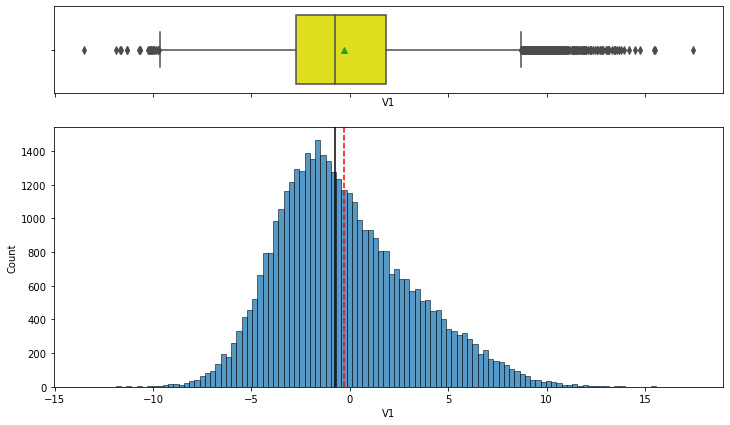

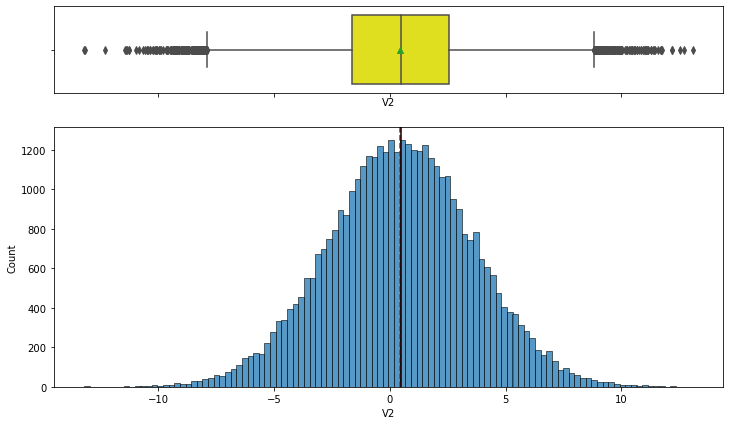

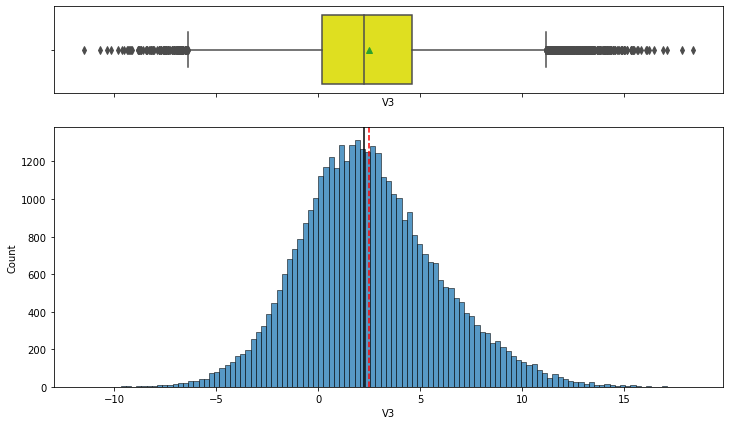

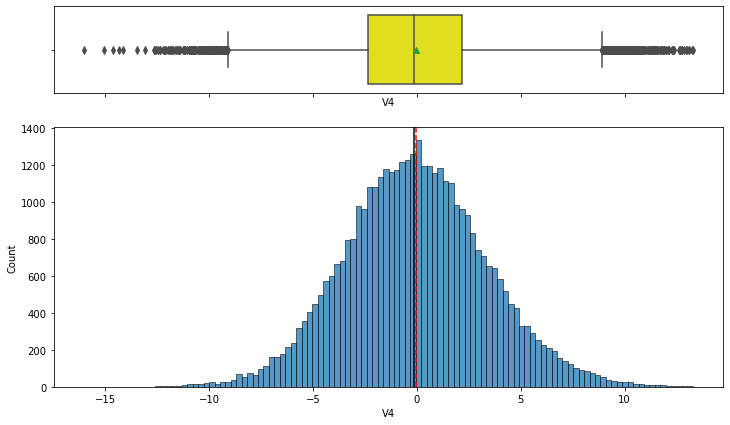

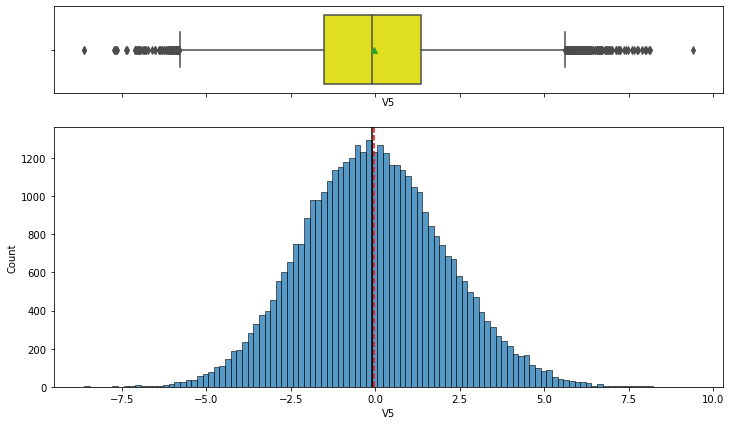

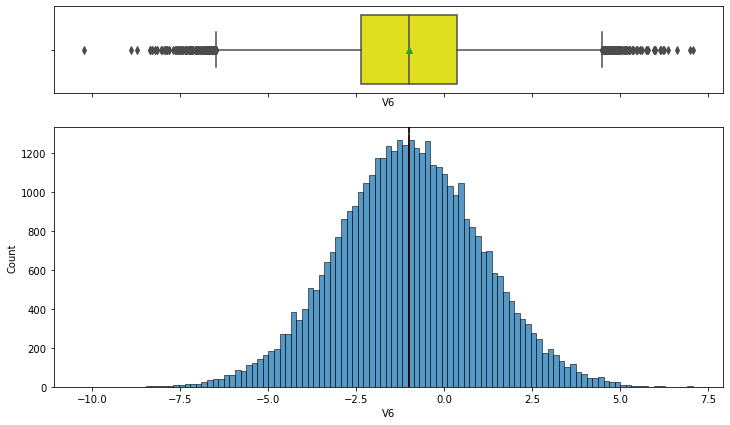

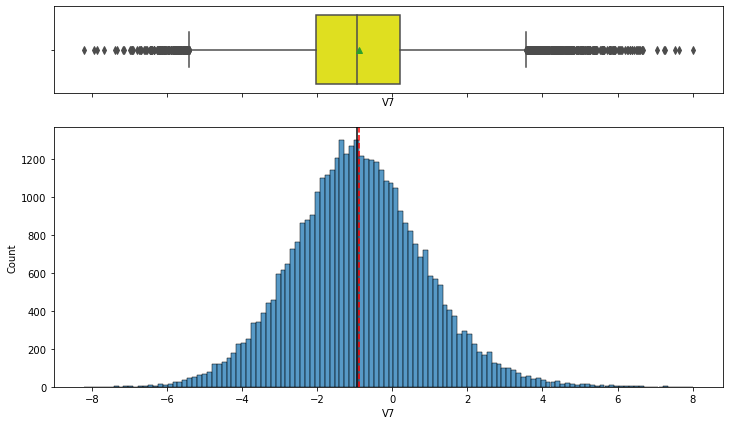

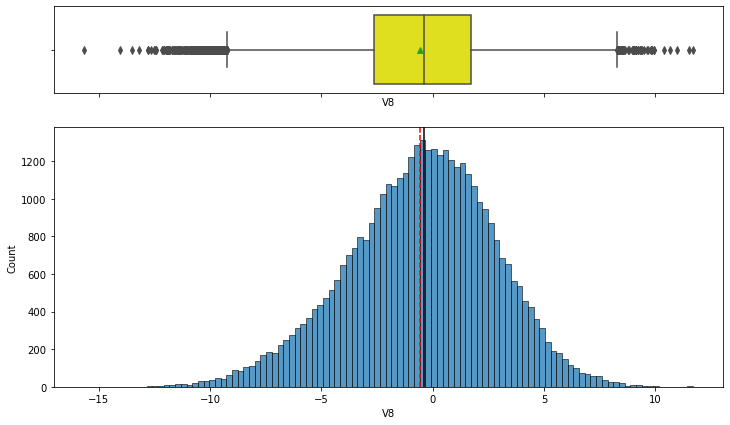

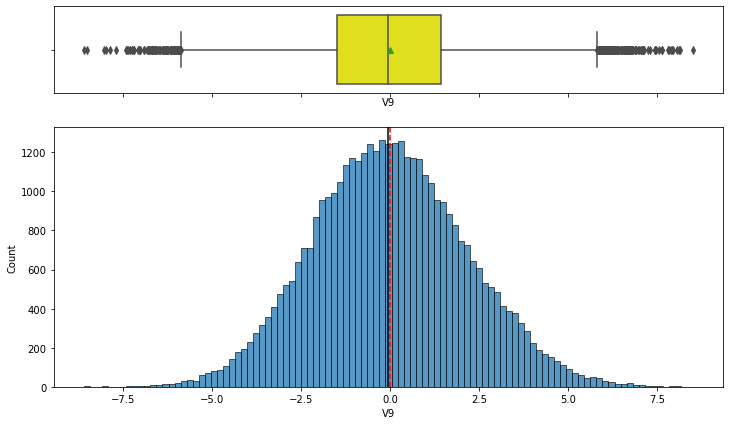

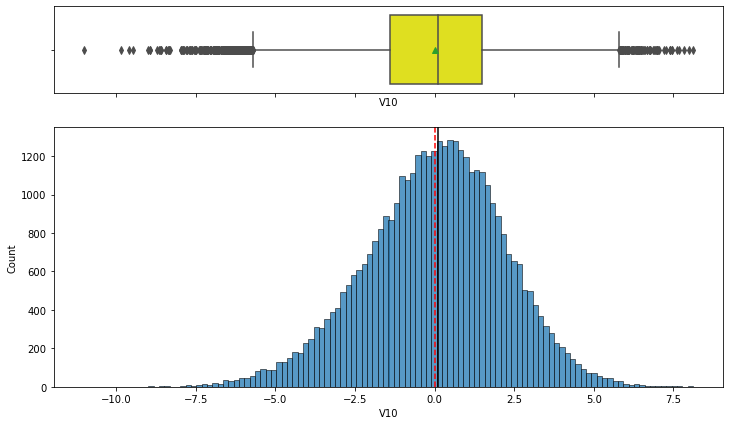

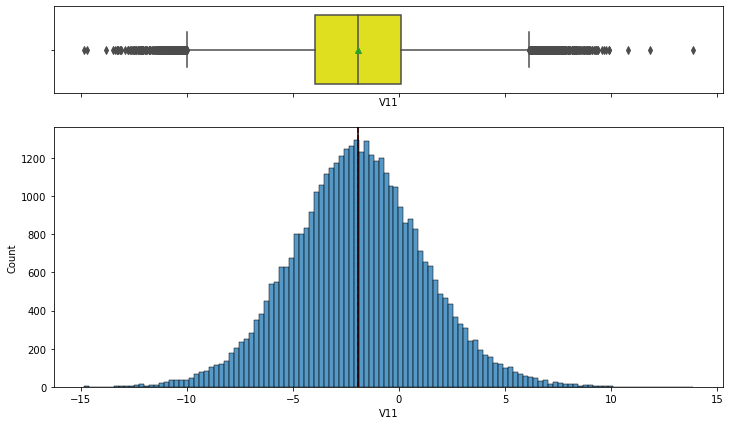

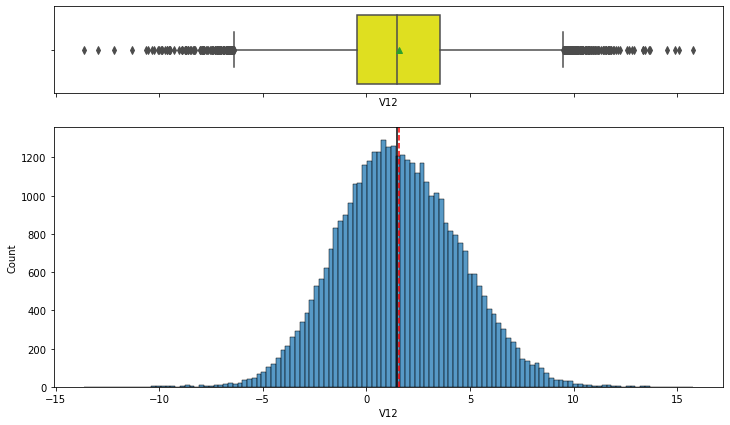

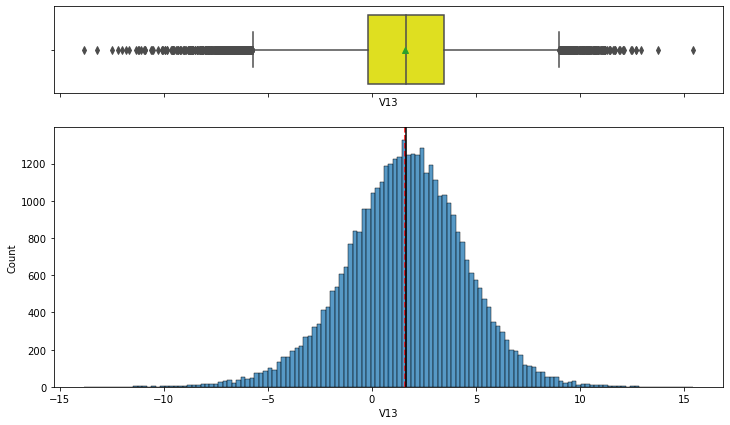

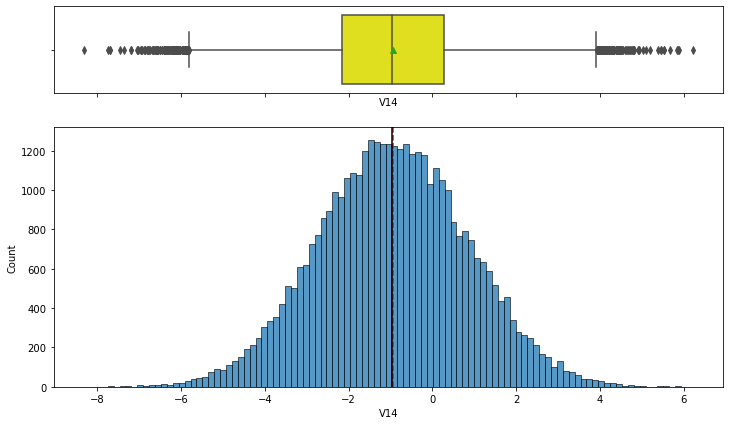

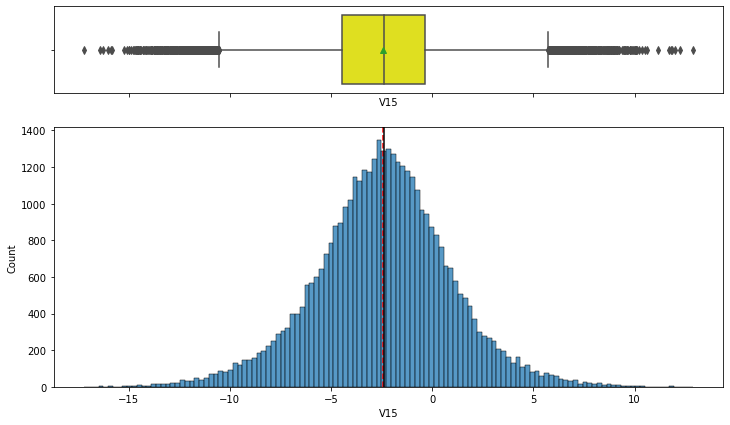

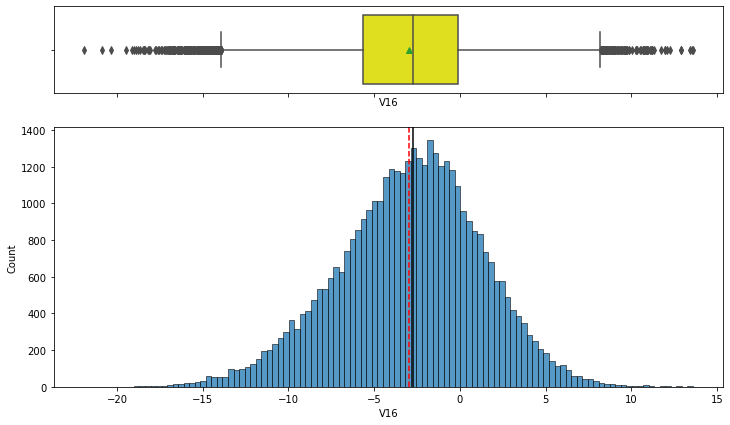

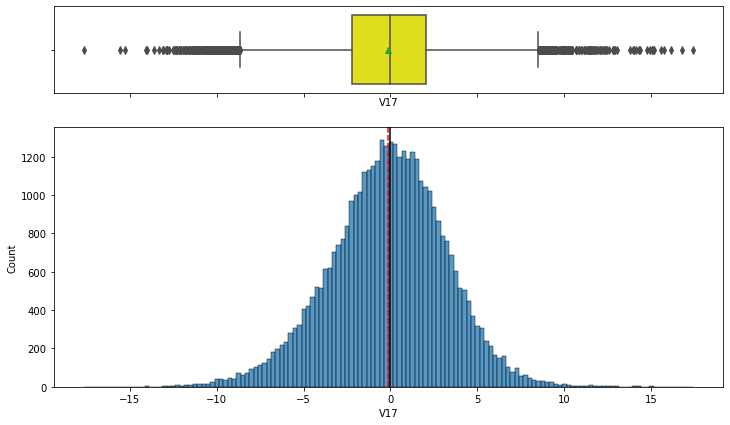

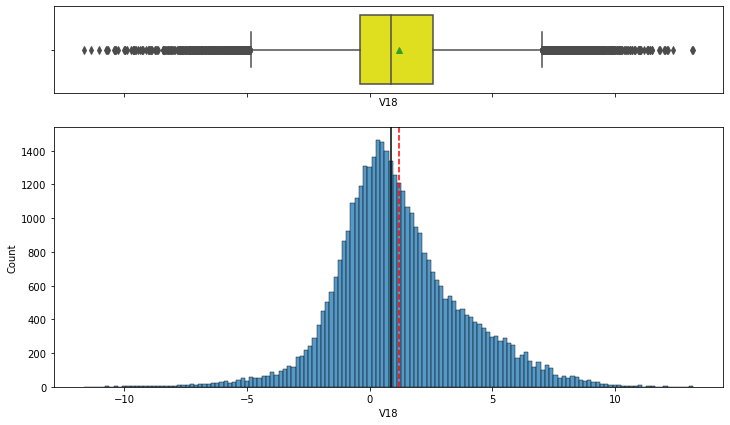

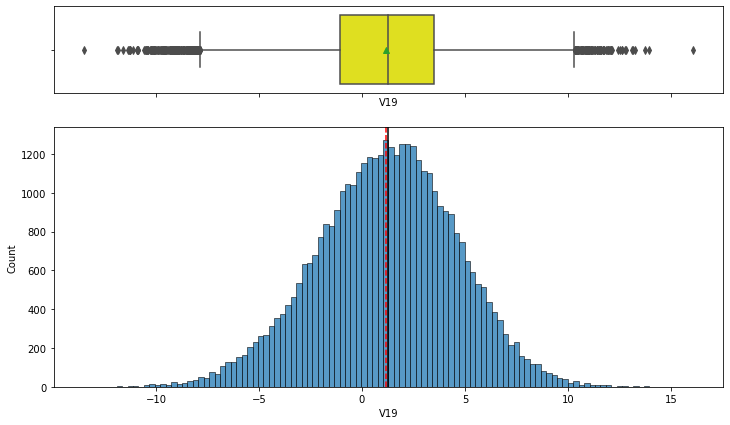

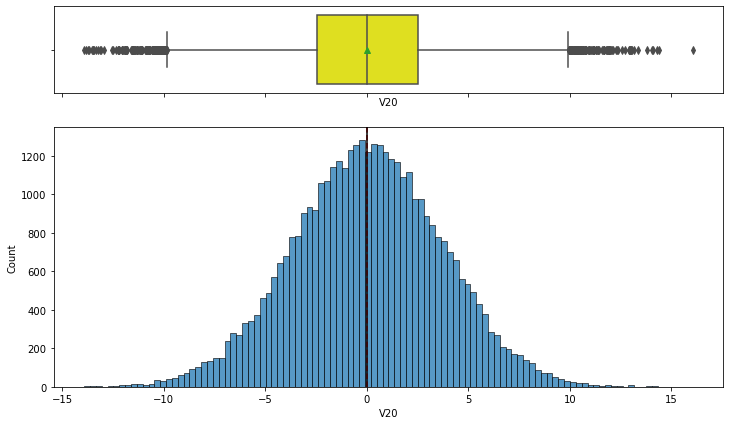

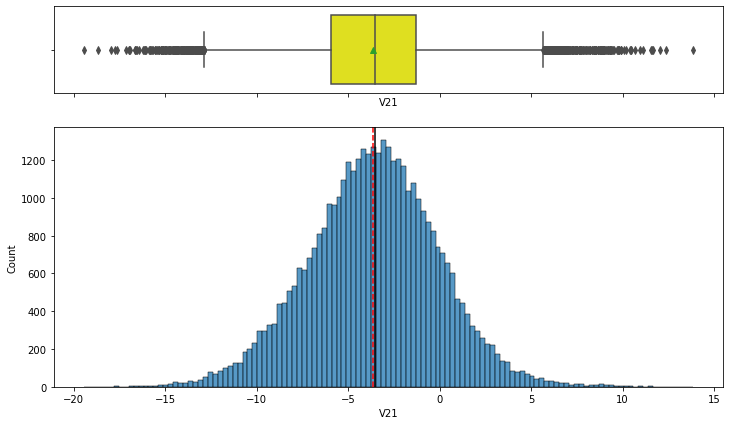

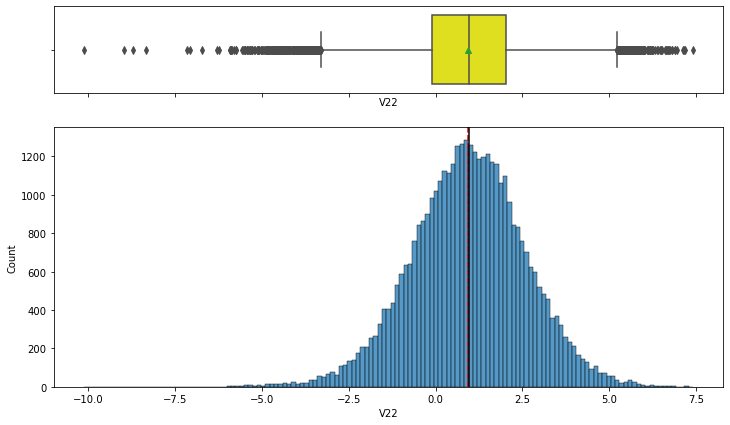

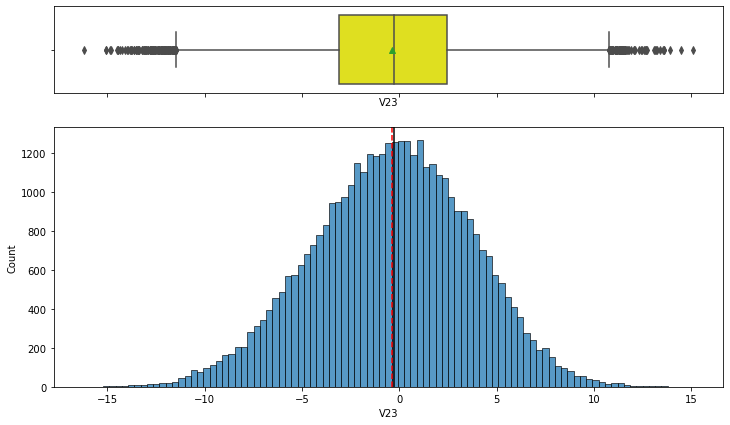

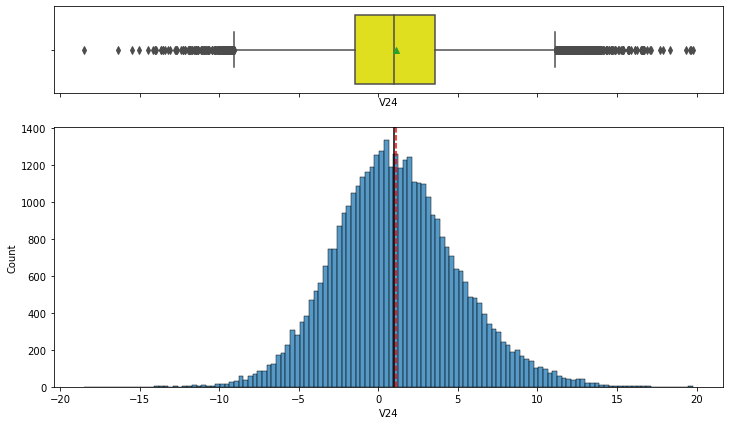

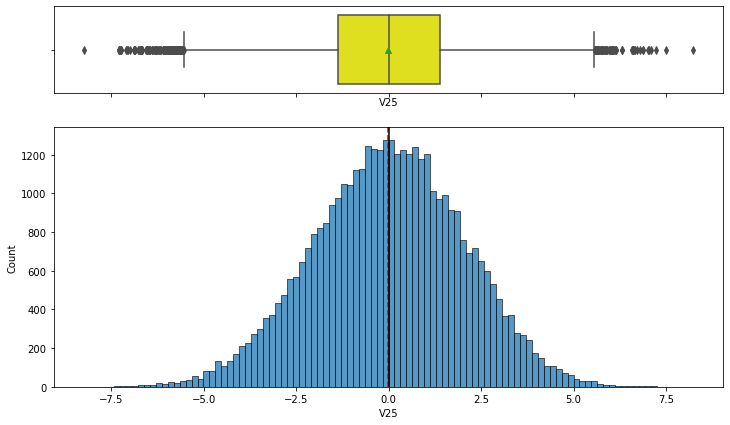

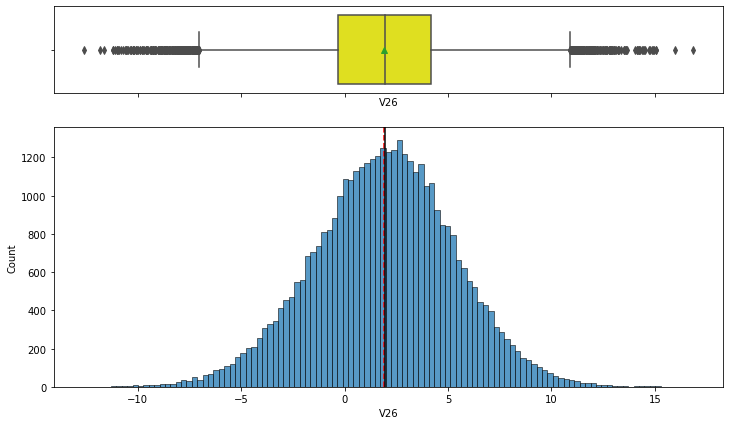

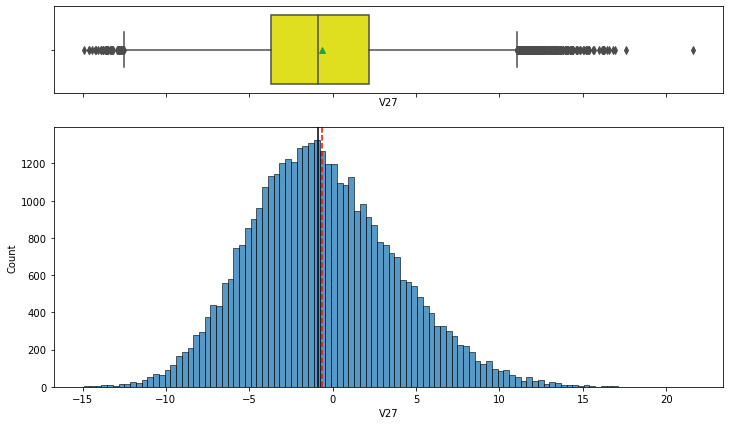

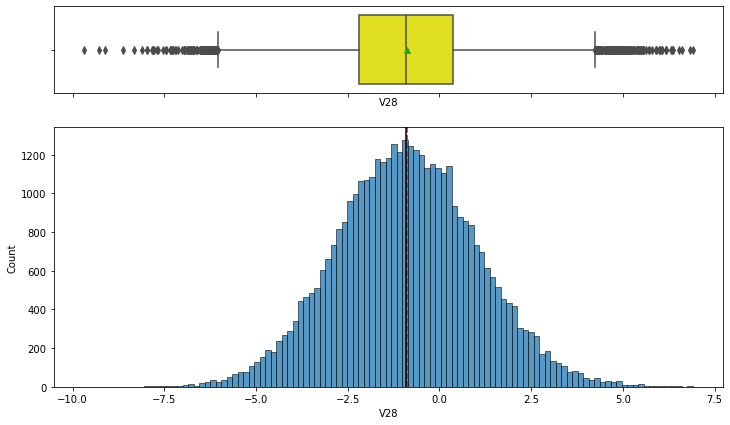

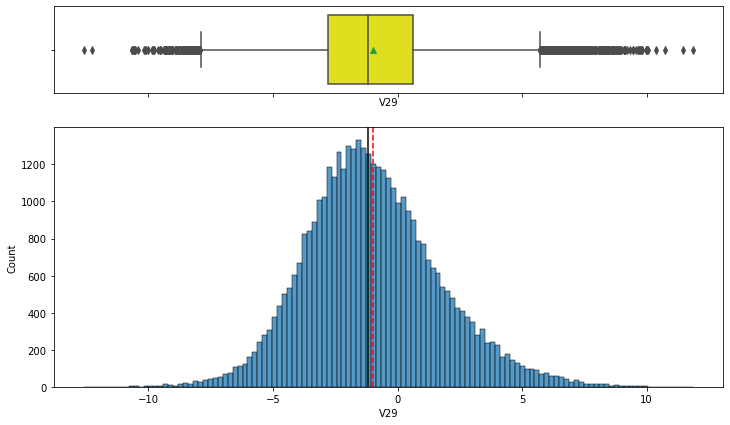

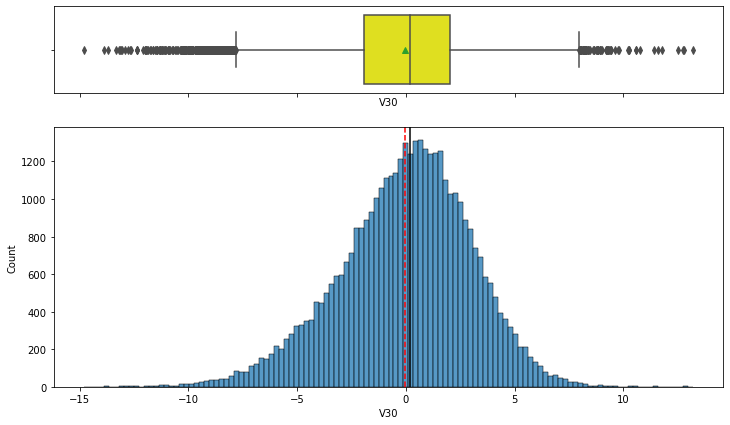

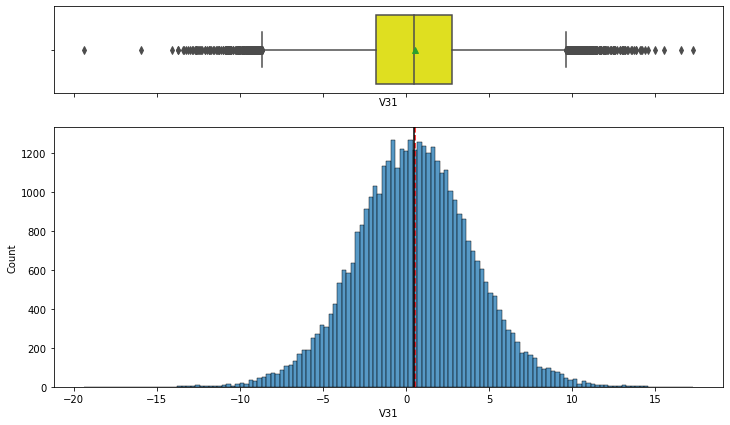

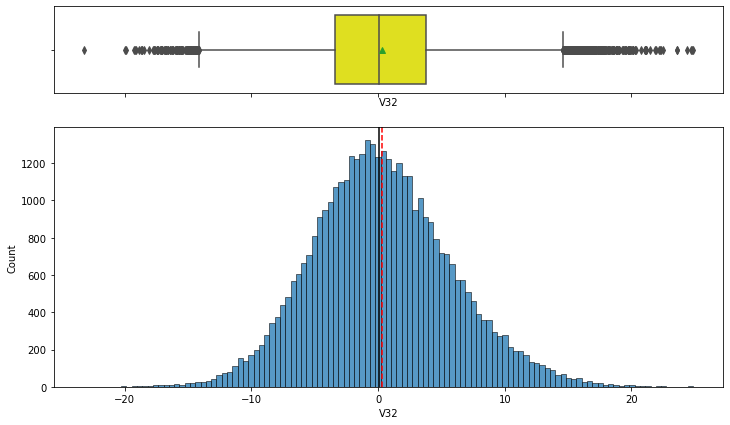

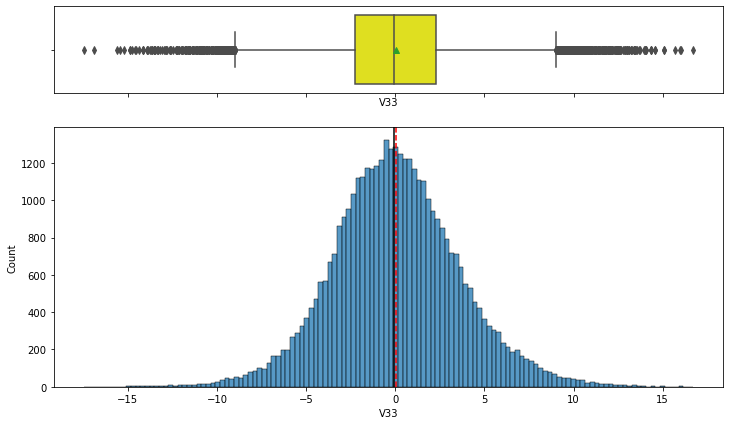

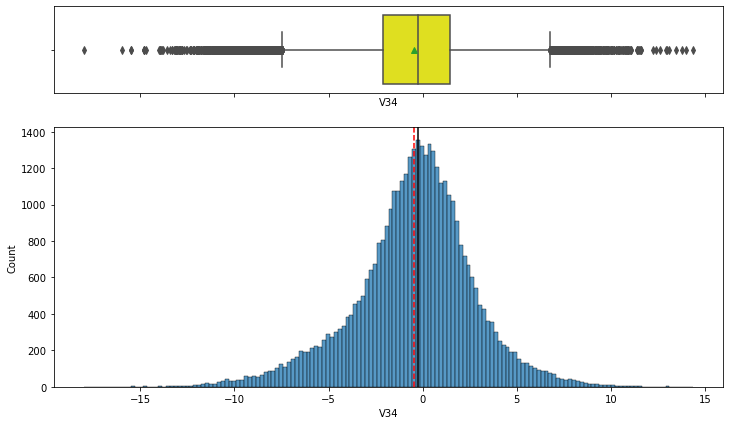

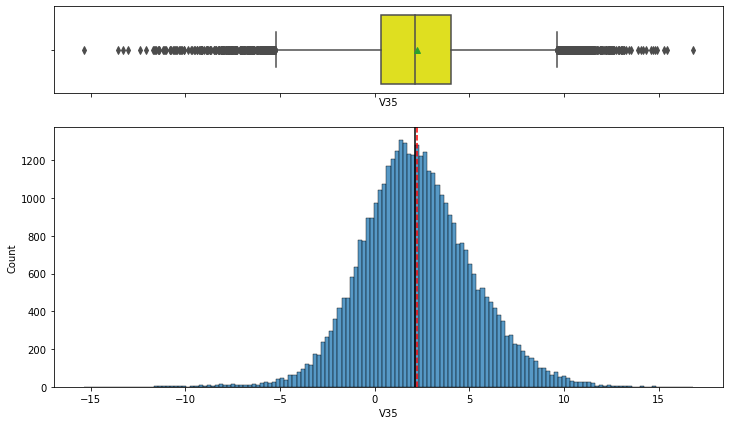

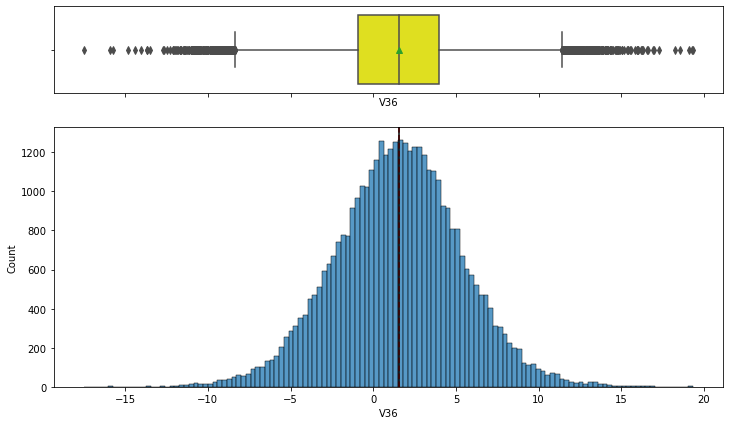

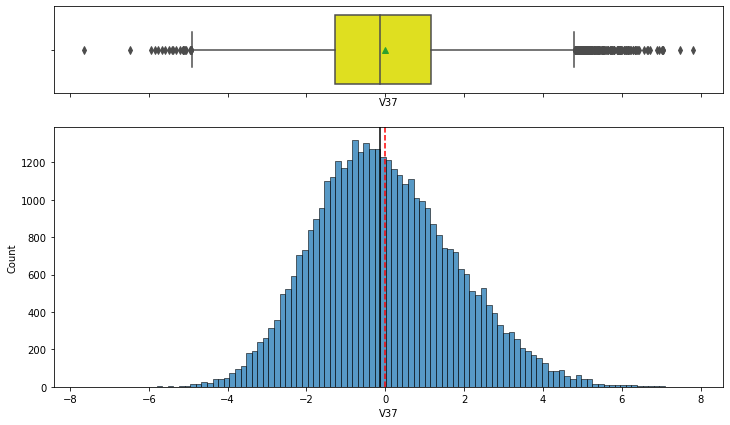

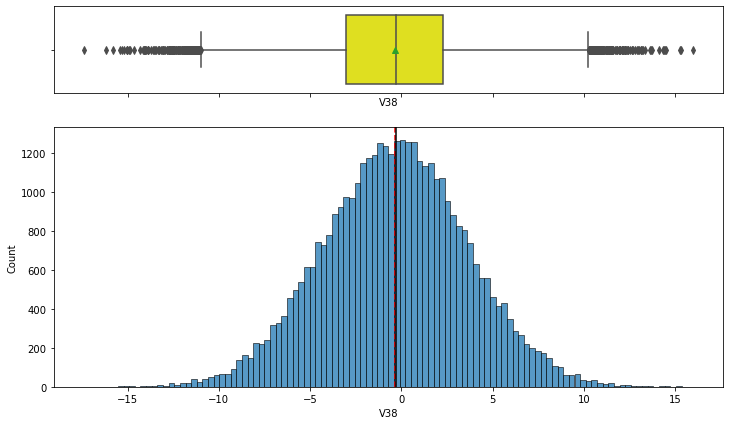

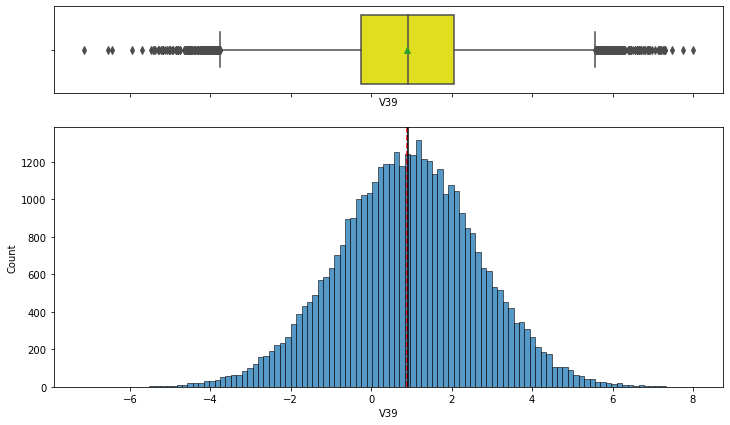

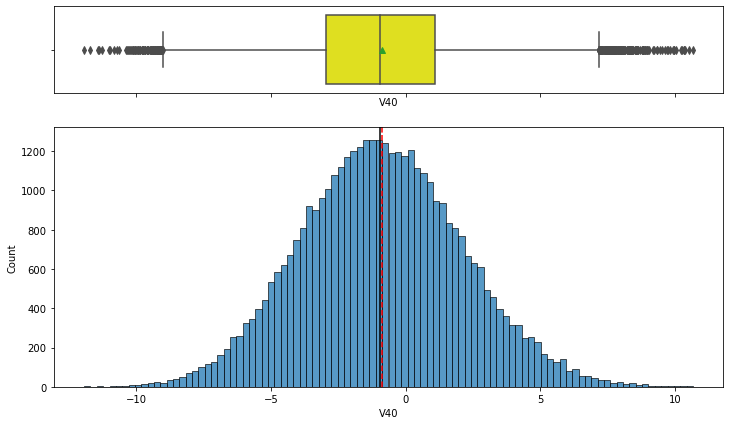

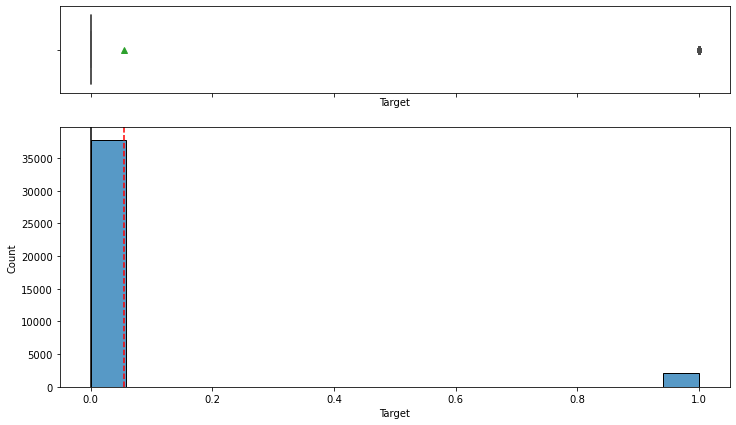

<IPython.core.display.Javascript object>

In [45]:
# Creating a loop for the histograms
for feature in data.columns:
    histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None)

### Checking the distribution of the classes in the Target variable

In [22]:
# Checking the distribution within the target variable for the training dataset
data[
    "Target"
].value_counts() 

0    37813
1     2187
Name: Target, dtype: int64

<IPython.core.display.Javascript object>

In [23]:
# Obtaining the precentual weight of the classes in the training dataset
data["Target"].value_counts(
    "Target"
)

0   0.945
1   0.055
Name: Target, dtype: float64

<IPython.core.display.Javascript object>

In [24]:
# Checking the distribution within the target variable for the test dataset
data_test[
    "Target"
].value_counts()

0    9453
1     547
Name: Target, dtype: int64

<IPython.core.display.Javascript object>

In [25]:
# Obtaining the precentual weight of the classes in the test dataset
data_test["Target"].value_counts("Target")

0   0.945
1   0.055
Name: Target, dtype: float64

<IPython.core.display.Javascript object>

#### Observations:
* We can observe that the most of the variables have a simmetrical or normal distribution or skewness equal to zero, some of the variables have a little positive (+) skewness, and some of them a little negative(-) skewness. The kurtosis on all the variables tends to be positive(+) or Leptokurtic. Although, for this case we consider not necessary to scale the data.
* The percentual weight of the target class in the training and test dataset is 94.5% for the class "0" or "no Failure", and 5.5% for the class "1" or "Failure".

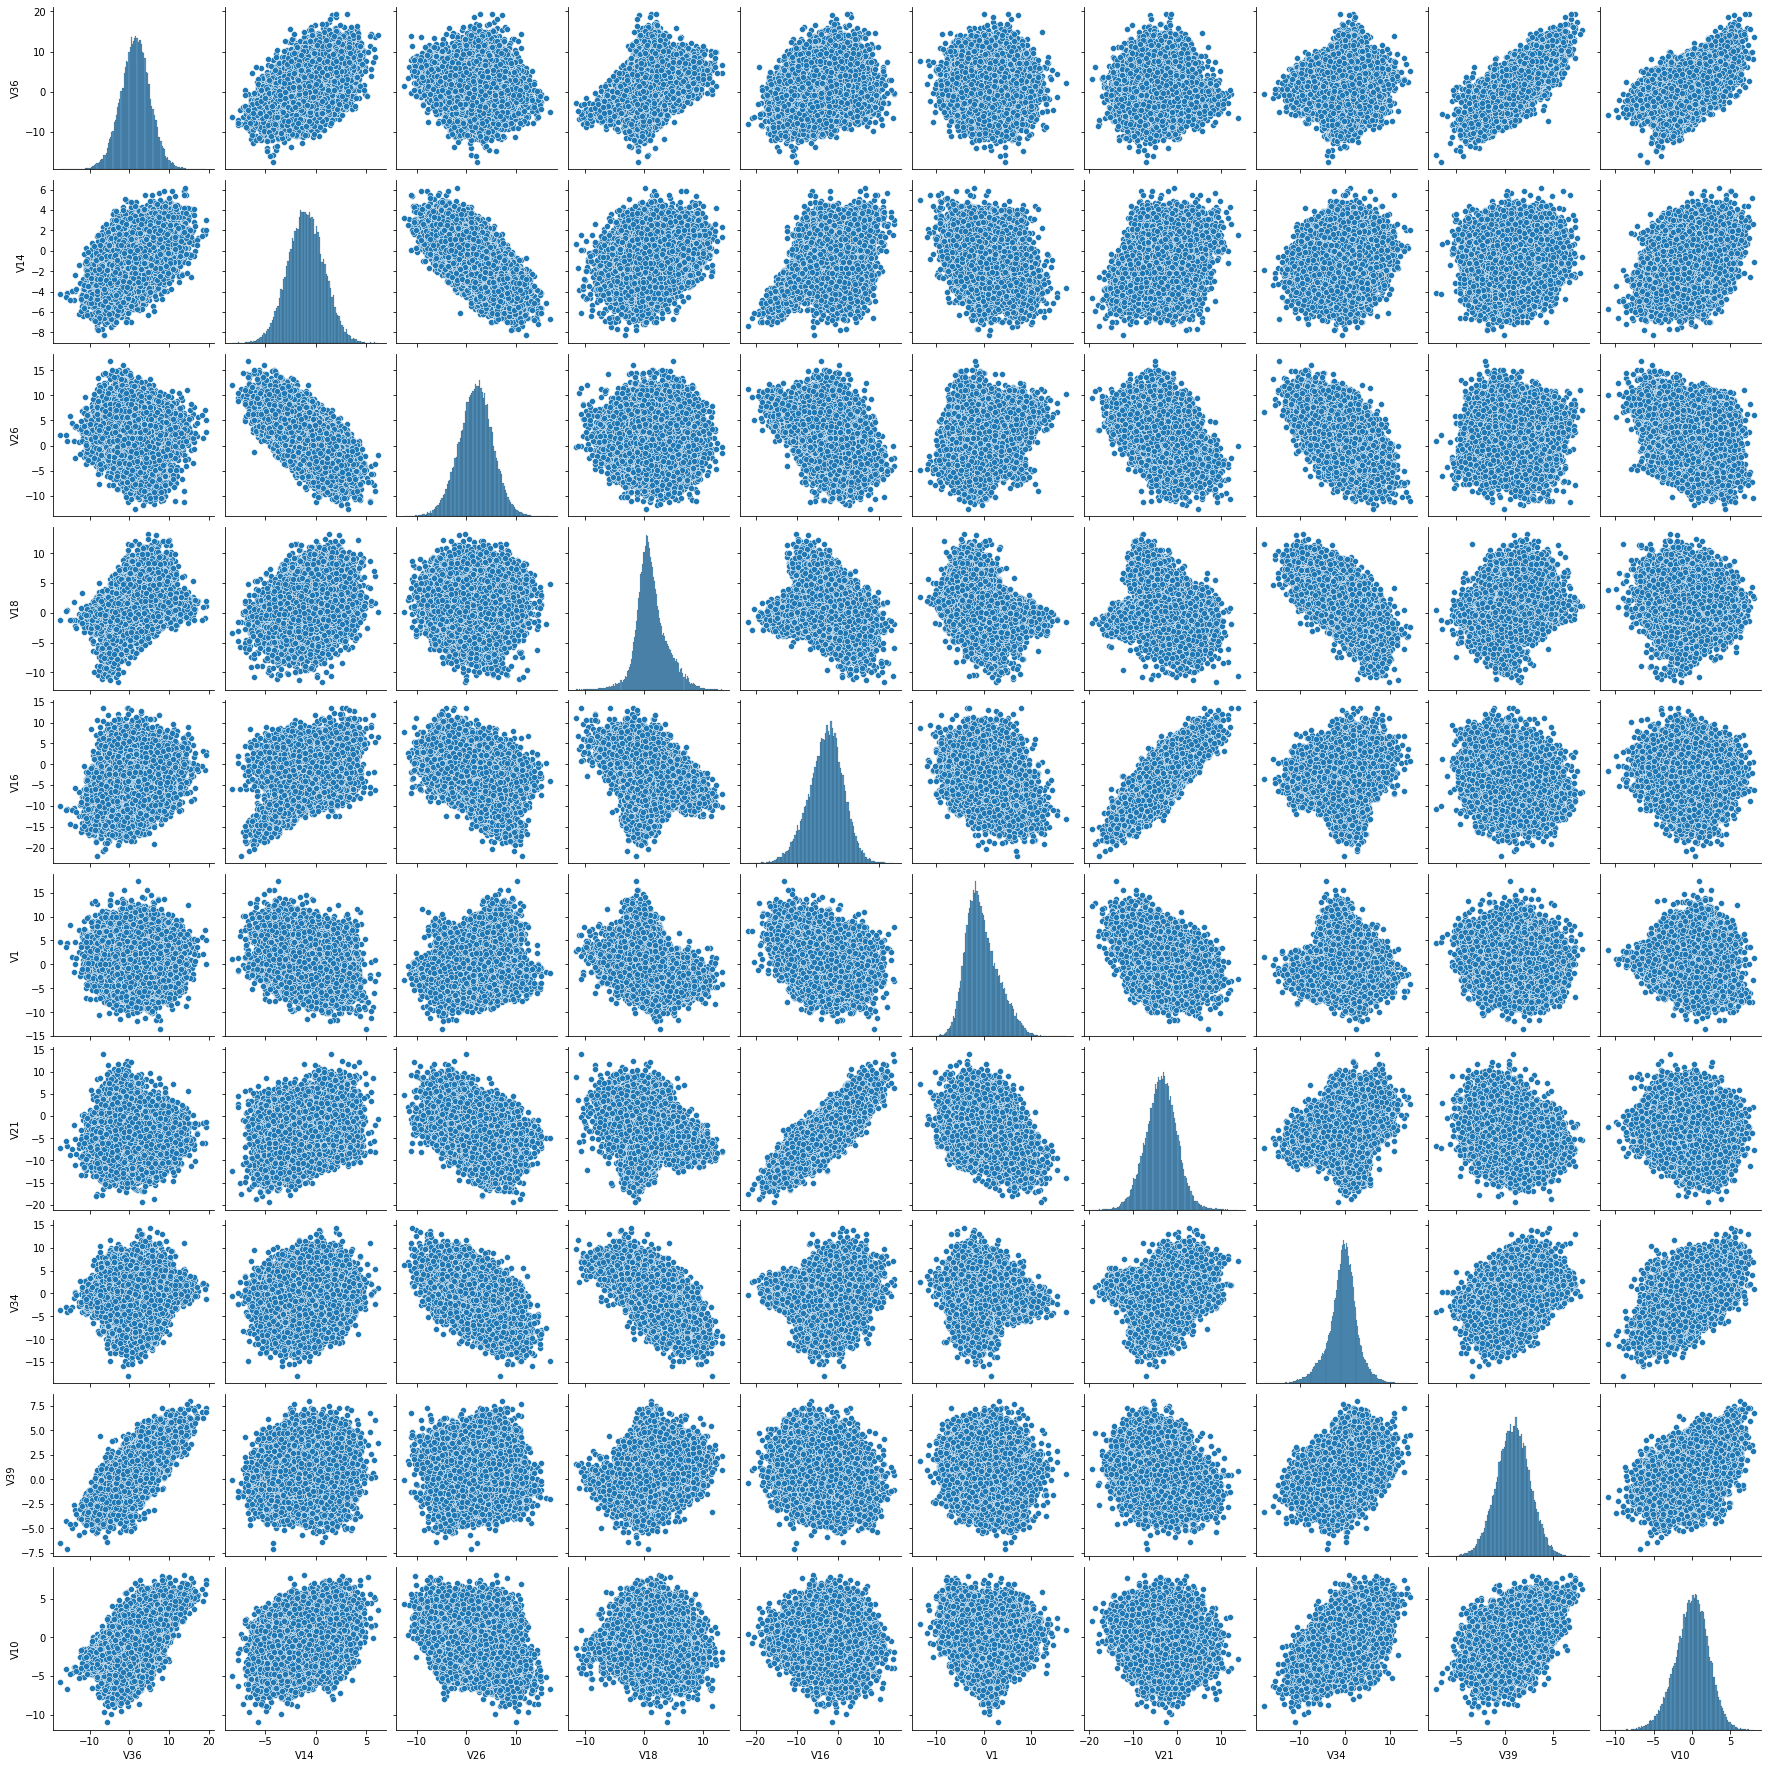

<IPython.core.display.Javascript object>

In [130]:
sns.pairplot(
    data[["V36", "V14", "V26", "V18", "V16", "V1", "V21", "V34", "V39", "V10"]]
)

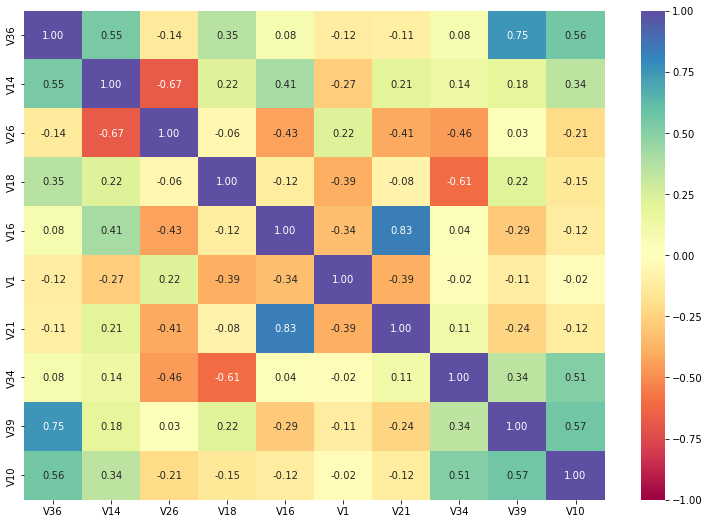

<IPython.core.display.Javascript object>

In [114]:
# Rethinking the EDA and Creating a heatmap from the most important features obtained in subsequent steps in this study.
cols_list = data[["V36", "V14", "V26", "V18", "V16", "V1", "V21", "V34", "V39", "V10"]]
plt.figure(figsize=(13, 9))
sns.heatmap(cols_list.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### Observations:
* We are going one step forward. From the importance features graph, we obtained the 10 most important of those features. We came back, into this table to establish the strongest correlations between the variables according to Pearson's coefficient, get an idea of the possible existence of collinearity, and get a better understanding of the relationships of the main variables in this project.
  * V36 vs V14 = + 0.55
  * V36 vs V18 = + 0.35
  * V36 vs V39 = + 0.75
  * V36 vs V10 = + 0.56
  * V14 vs V26 = - 0.67
  * V26 vs V16 = - 0.43
  * V26 vs V34 = - 0.46
  * V18 vs V36 = + 0.35
  * V18 vs V34 = - 0.61
  * V16 vs V21 = + 0.83
  * V1 vs V18 =  - 0.39
  * V1 vs V21 =  - 0.39
  * V10 vs V34 = + 0.51
  * V10 vs V39 = + 0.57 

<AxesSubplot:xlabel='V36', ylabel='V14'>

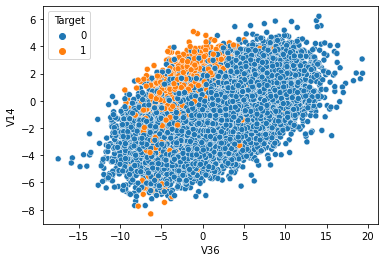

<IPython.core.display.Javascript object>

In [62]:
# Evaluating the relationship between V36 vs V14
sns.scatterplot(x="V36", y="V14", data=data, hue="Target")

#### Observations:
* We can observe a positive correlation (+ 0.55) between V36 and V14 variables. Also, we can stablish cutoffs related to the most evident failure zone according to these 2 variables, for V36 from -8 to 5 units & for V14 from -2 to 5 units approximately.

<AxesSubplot:xlabel='V36', ylabel='V18'>

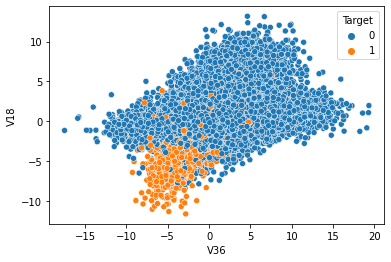

<IPython.core.display.Javascript object>

In [115]:
# Evaluating the relationship between V36 vs V18
sns.scatterplot(x="V36", y="V18", data=data, hue="Target")

#### Observations:
* The graph tend to show a positive correlation (+ 0.35) between the variables V36 and V18. The cutoffs related to the most evident failure zone according to these 2 variables are, for V36 from -8 to 0 units & for V18 from -12 to -2 units approximately.

<AxesSubplot:xlabel='V36', ylabel='V39'>

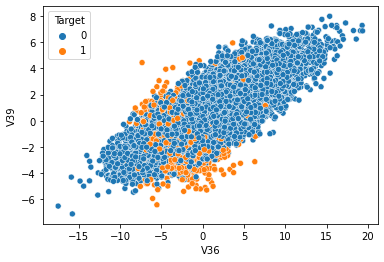

<IPython.core.display.Javascript object>

In [116]:
# Evaluating the relationship between V36 vs V39
sns.scatterplot(x="V36", y="V39", data=data, hue="Target")

#### Observations:
* The graph tend to show a strong positive correlation (+ 0.75) between V36 and V39 variables. The cutoffs related to the most evident failure zone according to these 2 variables are, for V36 from -8 to 5 units & for V39 from -6 to 3 units approximately. the variance in the failure zone is wider and disperse for the V39 variable.

<AxesSubplot:xlabel='V36', ylabel='V10'>

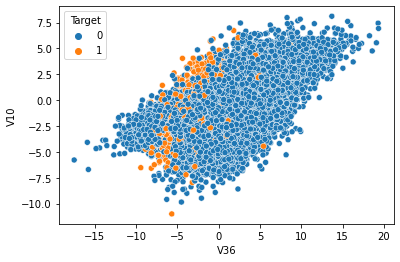

<IPython.core.display.Javascript object>

In [117]:
# Evaluating the relationship between V36 vs V10
sns.scatterplot(x="V36", y="V10", data=data, hue="Target")

#### Observations:
* The graph tend to show a positive correlation (+ 0.56) between V36 and V10 variables. The cutoffs related to the most evident failure zone according to these 2 variables are, for V36 from -8 to 2 units & for V10, we can see two cluster, the first one from -7.5 to -2.5 units approximately, and the second one from 0 to 5 units approximately.

<AxesSubplot:xlabel='V14', ylabel='V26'>

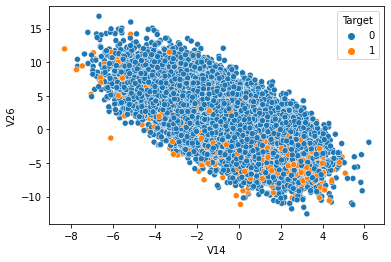

<IPython.core.display.Javascript object>

In [118]:
# Evaluating the relationship between V14 vs V26
sns.scatterplot(x="V14", y="V26", data=data, hue="Target")

#### Observations:
* The graph tend to show a negative correlation (-0.67) between V14 and V26 variables. The cutoffs related to the most evident failure zone according to these 2 variables are not as evident as we could observe in the previuos graphs. Although, it Seems to show the major concentration of failure points between 1 and 5 for V14, and -10 to -2 for V26.

<AxesSubplot:xlabel='V26', ylabel='V16'>

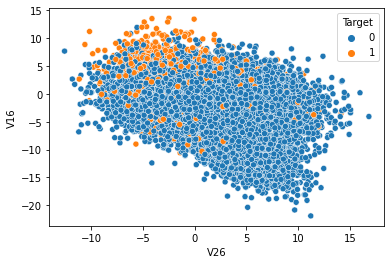

<IPython.core.display.Javascript object>

In [119]:
# Evaluating the relationship between V26 vs V16
sns.scatterplot(x="V26", y="V16", data=data, hue="Target")

#### Observations:
* The graph tend to show a negative correlation (-0.43) between V26 and V16 variables. The cutoffs related to the most evident failure zone according to these 2 variables are, for V26 from -10 to 2 units & for V16 from 5 to 13 units approximately.

<AxesSubplot:xlabel='V26', ylabel='V34'>

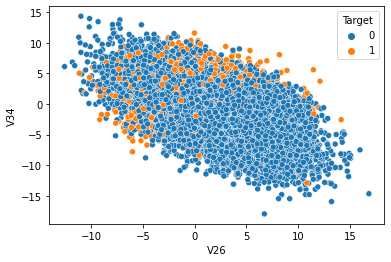

<IPython.core.display.Javascript object>

In [120]:
# Evaluating the relationship between V26 vs V34
sns.scatterplot(x="V26", y="V34", data=data, hue="Target")

#### Observations:
* The graph tend to show a negative correlation (-0.46) between V18 and V34 variables. The cutoffs related to the most evident failure zone according to these 2 variables are very disperse in contrast to the other variables.

<AxesSubplot:xlabel='V18', ylabel='V34'>

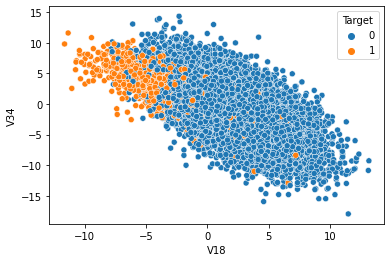

<IPython.core.display.Javascript object>

In [121]:
# Evaluating the relationship between V18 vs V34
sns.scatterplot(x="V18", y="V34", data=data, hue="Target")

#### Observations:
* The graph tend to show a negative correlation (-0.61) between the variables V18 and V34. The cutoffs related to the most evident failure zone according to these 2 variables are, for V18 from -12 to -3 units & for V34 from 0 to 10 units approximately. The critical zone is restricted to upper left quadrant of the graph.

<AxesSubplot:xlabel='V21', ylabel='V16'>

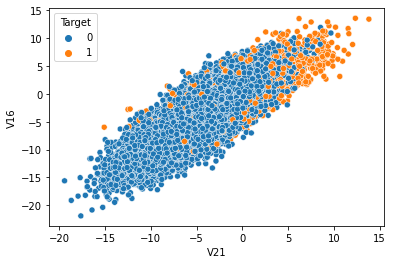

<IPython.core.display.Javascript object>

In [123]:
# Evaluating the relationship between V21 vs V16
sns.scatterplot(x="V21", y="V16", data=data, hue="Target")

#### Observations:
* The graph show the strongest positive correlation (+ 0.83) between the variables V21 and V16. The cutoffs related to the most evident failure zone according to these 2 variables are, for V21 from 5 to 12 units & for V16 from 2 to 10 units approximately. the variance in the failure zone is wider and disperse for the V16 variable.

<AxesSubplot:xlabel='V1', ylabel='V18'>

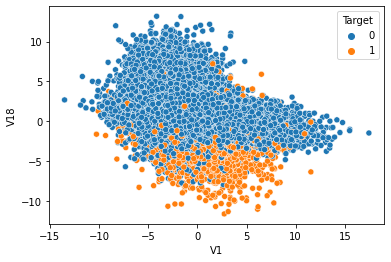

<IPython.core.display.Javascript object>

In [124]:
# Evaluating the relationship between V1 vs V18
sns.scatterplot(x="V1", y="V18", data=data, hue="Target")

#### Observations:
* The graph shows a negative correlation (- 0.39) between the variables V1 and V18. The cutoffs related to the most evident failure zone according to these 2 variables are, for V1 from -5 to 8 units & for V18 from -12 to -4 units approximately. the variance in the failure zone is wider and disperse for the V1 variable.

<AxesSubplot:xlabel='V1', ylabel='V21'>

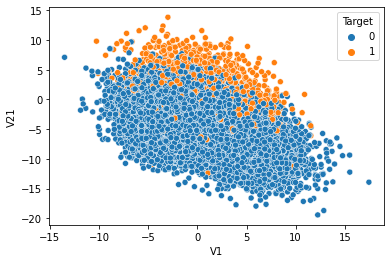

<IPython.core.display.Javascript object>

In [125]:
# Evaluating the relationship between V1 vs V21
sns.scatterplot(x="V1", y="V21", data=data, hue="Target")

#### Observations:
* The graph shows a negative correlation (- 0.39) between the variables V1 and V21. The cutoffs related to the most evident failure zone according to these 2 variables are, for V1 from -5 to 8 units & for V18 from 0 to 10 units approximately. the variance in the failure zone is wider and disperse for the V1 variable.

<AxesSubplot:xlabel='V10', ylabel='V34'>

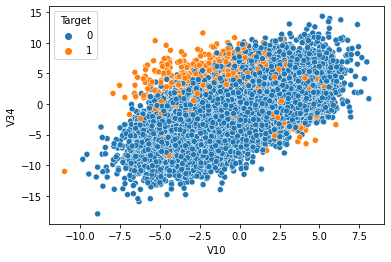

<IPython.core.display.Javascript object>

In [128]:
# Evaluating the relationship between V10 vs V34
sns.scatterplot(x="V10", y="V34", data=data, hue="Target")

#### Observations:
* The graph shows a positive correlation (+ 0.51) between the variables V10 and V34. The cutoffs related to the most evident failure zone according to these 2 variables are, for V10 from -7 to 0 units & for V34 from 2 to 8 units approximately. the variance in the failure zone is wider and disperse for the variable V10.

<AxesSubplot:xlabel='V10', ylabel='V39'>

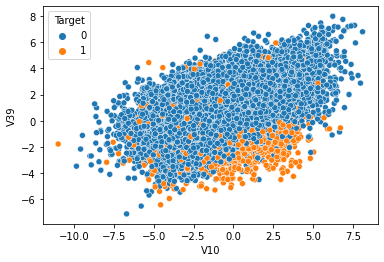

<IPython.core.display.Javascript object>

In [129]:
# Evaluating the relationship between V10 vs V39
sns.scatterplot(x="V10", y="V39", data=data, hue="Target")

#### Observations:
* The graph shows a positive correlation (+ 0.57) between the variables V10 and V39. The cutoffs related to the most evident failure zone according to these 2 variables are, for V10 from -2.5 to 4 units & for V39 from -5 to -1 units approximately. the variance in the failure zone is wider and disperse for the variable V10.

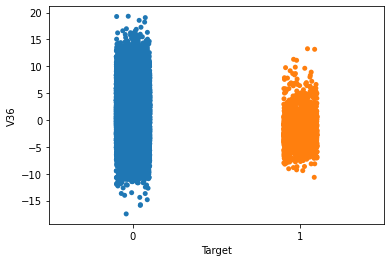

<IPython.core.display.Javascript object>

In [61]:
sns.stripplot(data=data, x="Target", y="V36", jitter=True)

<AxesSubplot:xlabel='Target', ylabel='V34'>

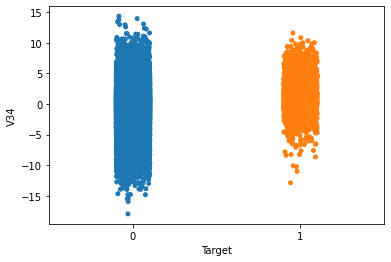

<IPython.core.display.Javascript object>

In [133]:
sns.stripplot(data=data, x="Target", y="V34", jitter=True)

#### Observations:
* As we can see from the strip plots, the variance in the fault zone is lower for variables V36 and V34, which would serve as good discretization factors when characterizing the various failure families in future stages of this project.

## Data Preparation for Modeling

In [46]:
# Taken form MLS2 project (Job change prediction)
# Dividing data into X and y
X = data.drop(["Target"], axis=1)
y = data["Target"]

# Dropping the target variable from test dataset
# and Storing the target variable within the y_test dataset
X_test = data_test.drop(["Target"], axis=1)
y_test = data_test["Target"]

<IPython.core.display.Javascript object>

In [47]:
# Splitting data into training and validation(ratio 75:25)
# Using stratify=y to keep the proportion of the classes in the train and validation set
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.25, random_state=1, stratify=y
)

print(X_train.shape, X_val.shape, X_test.shape)

(30000, 40) (10000, 40) (10000, 40)


<IPython.core.display.Javascript object>

### Imputing missing values

In [49]:
# Using the median as imputer for the missing values
imputer = SimpleImputer(strategy="median")

<IPython.core.display.Javascript object>

In [50]:
# Fitting and transforming the training dataset
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Transforming the validation dataset imputing the missing values with the median
X_val = pd.DataFrame(imputer.transform(X_val), columns=X_val.columns)

# Transforming the testing dataset by imputing the missing values with the median
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

<IPython.core.display.Javascript object>

In [51]:
# Rechecking the missing values within the training dataset
X_train.isna().sum()

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64

<IPython.core.display.Javascript object>

In [52]:
# Checking the missing values within the validation dataset
X_val.isnull().sum()

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64

<IPython.core.display.Javascript object>

In [53]:
# Checking the missing values within the test dataset
X_test.isnull().sum()

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
* After imputing the missing values with the median, we do not have any missing value within the training, validation and test dataset.

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model. 
- False positives (FP) are failure detections in a generator where there is no failure.

### Which metric to optimize?

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [33]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [34]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Defining scorer to be used for cross-validation and hyperparameter tuning

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use Recall as a **scorer** in cross-validation and hyperparameter tuning.

In [35]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

<IPython.core.display.Javascript object>

### Model Building using the original data

In [36]:
# we are going to build 6 models with the original data: Logistic regression, Decision Tree, Random Forest, Bagging, GradientBoosting, Adaboost, and XGBoost 
# Taken form the MLS2 standardized project
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Decision Tree", DecisionTreeClassifier(random_state=1)))
models.append(("Random Forest", RandomForestClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("GradientBoosting", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1, eval_metric="logloss")))


results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Cost:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Cost:

Logistic regression: 0.47073170731707314
Decision Tree: 0.7359756097560975
Random Forest: 0.7567073170731707
Bagging: 0.7158536585365853
GradientBoosting: 0.7158536585365852
Adaboost: 0.5981707317073169
XGBoost: 0.8219512195121951

Validation Performance:

Logistic regression: 0.4789762340036563
Decision Tree: 0.7312614259597806
Random Forest: 0.7751371115173674
Bagging: 0.7513711151736746
GradientBoosting: 0.7404021937842779
Adaboost: 0.5996343692870201
XGBoost: 0.8372943327239488


<IPython.core.display.Javascript object>

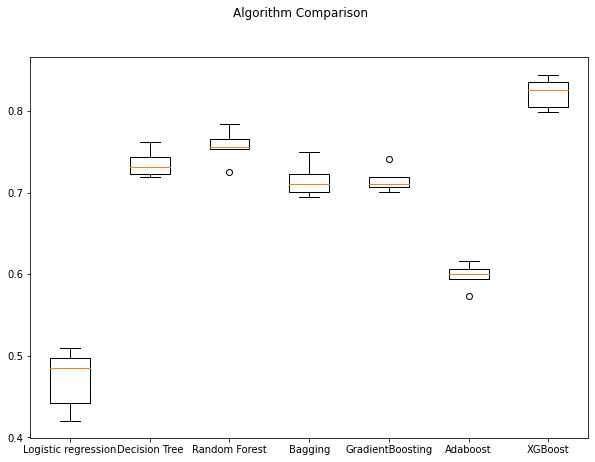

<IPython.core.display.Javascript object>

In [37]:
# Plotting boxplots for CV scores of all models defined above
# Taken from the German Credit project week2 
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

#### Observations:
* We can see that the XGBoost is giving the highest cross-validated recall followed by the Random Forest, the decision Tree, Bagging and Gradient Boost model from the original data.
* The boxplot shows that the performance fo the XGBoost and Random Forest is very consistent through the training and the validation dataset, which is really good.
* We will compare the performance against the model building with oversample and undersample as well to pick the best four models and apply the hyperparameters tuning, in order to see if the performance improves. 

### Model Building with oversampled data using SMOTE 

In [38]:
# Oversampling training data using SMOTE to increase the frequency of the minority class
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_over == 0)))


print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, counts of label '1': 1640
Before OverSampling, counts of label '0': 28360 

After OverSampling, counts of label '1': 28360
After OverSampling, counts of label '0': 28360 

After OverSampling, the shape of train_X: (56720, 40)
After OverSampling, the shape of train_y: (56720,) 



<IPython.core.display.Javascript object>

In [39]:
# Taken form the MLS2 standardized project
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Decision Tree", DecisionTreeClassifier(random_state=1)))
models.append(("Random Forest", RandomForestClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("GradientBoosting", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1, eval_metric="logloss")))


results2 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Cost - with Oversampling:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scorer, cv=kfold
    )
    results2.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance - with Oversampling:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Cost - with Oversampling:

Logistic regression: 0.8663258110014105
Decision Tree: 0.9691466854724965
Random Forest: 0.9830394922425952
Bagging: 0.9734485190409027
GradientBoosting: 0.9096262341325809
Adaboost: 0.885719322990127
XGBoost: 0.9855782792665726

Validation Performance - with Oversampling:

Logistic regression: 0.8537477148080439
Decision Tree: 0.8336380255941499
Random Forest: 0.8848263254113345
Bagging: 0.850091407678245
GradientBoosting: 0.8939670932358318
Adaboost: 0.8628884826325411
XGBoost: 0.8939670932358318


<IPython.core.display.Javascript object>

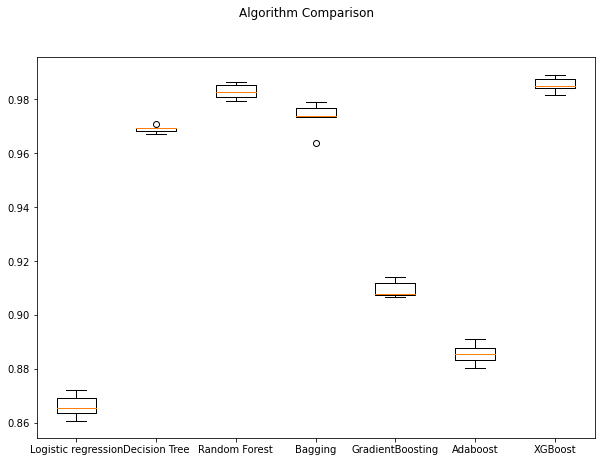

<IPython.core.display.Javascript object>

In [40]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results2)
ax.set_xticklabels(names)

plt.show()

#### Observations:
* After the oversampling, we can see that the XGBoost is still giving the highest cross-validated recall followed by the Random Forest, Bagging and the decision Tree. Although, the Gradient Boost model is under the Decision Tree model in performance, we are going to include The Gadient Boost Model instead of the Decision Tree because the last does not perfoms well in production so the Gradiente Boost model is more reliable for this stage.
* The XGBoost, Random Forest, and Bagging seems to be overfitting on the training dataset. However, the performance in the Validation dataset is quite good.
* We will compare the performance against the model building with Undersampling to pick the best four models and apply the hyperparameters tuning, in order to see if the performance improves. 
* The Decision Tree model has an upper outlier while the Bagging model present a lower outlier.
* So far, I will be taking the XGBoost, Random Forest, Bagging, and the Gradient Boost with oversampling models as the input for the hyperparameters model tuning.

### Model Building with undersampled data

In [41]:
# Applying Undersampling with RandomUnderSampler to decrease the frequency of the majority class 
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)


print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0)))


print("After UnderSampling, counts of label '1': {}".format(sum(y_train_un == 1)))
print("After UnderSampling, counts of label '0': {} \n".format(sum(y_train_un == 0)))


print("After UnderSampling, the shape of train_X: {}".format(X_train_un.shape))
print("After UnderSampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before UnderSampling, counts of label '1': 1640
Before UnderSampling, counts of label '0': 28360 

After UnderSampling, counts of label '1': 1640
After UnderSampling, counts of label '0': 1640 

After UnderSampling, the shape of train_X: (3280, 40)
After UnderSampling, the shape of train_y: (3280,) 



<IPython.core.display.Javascript object>

In [42]:
# Taken form the MLS2 standardized project
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Decision Tree", DecisionTreeClassifier(random_state=1)))
models.append(("Random Forest", RandomForestClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("GradientBoosting", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1, eval_metric="logloss")))


results3 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Cost - with Undersampling:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scorer, cv=kfold
    )
    results3.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance - with Undersampling:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Cost - with Undersampling:

Logistic regression: 0.85
Decision Tree: 0.8548780487804878
Random Forest: 0.8914634146341462
Bagging: 0.8658536585365854
GradientBoosting: 0.8865853658536587
Adaboost: 0.8585365853658535
XGBoost: 0.8908536585365854

Validation Performance - with Undersampling:

Logistic regression: 0.8628884826325411
Decision Tree: 0.8628884826325411
Random Forest: 0.9104204753199269
Bagging: 0.870201096892139
GradientBoosting: 0.8976234003656307
Adaboost: 0.870201096892139
XGBoost: 0.9140767824497258


<IPython.core.display.Javascript object>

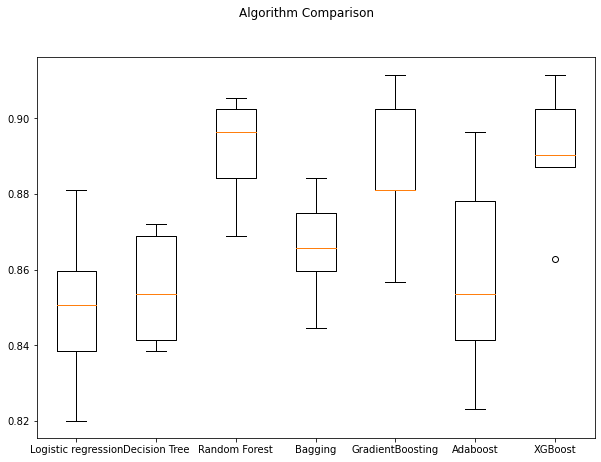

<IPython.core.display.Javascript object>

In [43]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results3)
ax.set_xticklabels(names)

plt.show()

#### Observations:
* Cross-Validation Cost - with Oversampling:
  * Logistic regression: 0.8663258110014105
  * Decision Tree: 0.9691466854724965
  * Random Forest: 0.9830394922425952
  * Bagging: 0.9734485190409027
  * GradientBoosting: 0.9096262341325809
  * Adaboost: 0.885719322990127
  * XGBoost: 0.9855782792665726

* Validation Performance - with Oversampling:
  * Logistic regression: 0.8537477148080439
  * Decision Tree: 0.8336380255941499
  * Random Forest: 0.8848263254113345
  * Bagging: 0.850091407678245
  * GradientBoosting: 0.8939670932358318
  * Adaboost: 0.8628884826325411
  * XGBoost: 0.8939670932358318

* Cross-Validation Cost - with Undersampling:
  * Logistic regression: 0.85
  * Decision Tree: 0.8548780487804878
  * Random Forest: 0.8914634146341462
  * Bagging: 0.8658536585365854
  * GradientBoosting: 0.8865853658536587
  * Adaboost: 0.8585365853658535
  * XGBoost: 0.8908536585365854

* Validation Performance - with Undersampling:
  * Logistic regression: 0.8628884826325411
  * Decision Tree: 0.8628884826325411
  * Random Forest: 0.9104204753199269
  * Bagging: 0.870201096892139
  * GradientBoosting: 0.8976234003656307
  * Adaboost: 0.870201096892139
  * XGBoost: 0.9140767824497258
  
* According to the performnace obtained from the Oversampling and Undersampling modeling, we have decided to work on the hyperparameter tuning with the oversampled models. It is very evident that the performance was superior for the models with oversampling both in the training and in the validation test. From the CV Boxplot graphs of the undersampling models, we can see that the variance is greater than the models built with oversampling.

## Hyperparameter Tuning

### Sample Parameter Grids

**Hyperparameter tuning can take a long time to run, so to avoid that time complexity - you can use the following grids, wherever required.**

- For Gradient Boosting:

param_grid = {
    "n_estimators": np.arange(100,150,25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample":[0.5,0.7], 
    "max_features":[0.5,0.7]
}

- For Adaboost:

param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

- For Bagging Classifier:

param_grid = {
    'max_samples': [0.8,0.9,1], 
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

- For Random Forest:

param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

- For Decision Trees:

param_grid = {
    'max_depth': np.arange(2,6), 
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

- For Logistic Regression:

param_grid = {'C': np.arange(0.1,1.1,0.1)}

- For XGBoost:

param_grid={
    'n_estimators': [150, 200, 250],
    'scale_pos_weight': [5,10],
    'learning_rate': [0.1,0.2],
    'gamma': [0,3,5],
    'subsample': [0.8,0.9]
}

### Sample tuning method for Bagging classifier with oversampled data

In [71]:
%%time 

# defining model
Model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
              'max_samples': [0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9],
              'n_estimators' : [30,50,70],
             }


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 50, 'max_samples': 1, 'max_features': 0.7} with CV score=1.0:
Wall time: 34min 23s


<IPython.core.display.Javascript object>

In [50]:
# Creating new pipeline with best parameters
tuned_bag2 = BaggingClassifier(
    max_features=0.7, random_state=1, max_samples=1, n_estimators=50
)
# Fitting the model with the oversampled data
tuned_bag2.fit(
    X_train_over, y_train_over
)  

BaggingClassifier(max_features=0.7, max_samples=1, n_estimators=50,
                  random_state=1)

<IPython.core.display.Javascript object>

In [46]:
bag2_train_perf = model_performance_classification_sklearn(
    tuned_bag2, X_train_over, y_train_over
)
bag2_train_perf

Accuracy  Recall  Precision    F1
0     0.500   1.000      0.500 0.667

<IPython.core.display.Javascript object>

In [47]:
# Checking the model performance on the validation dataset
bag2_val_perf = model_performance_classification_sklearn(
    tuned_bag2,
    X_val,
    y_val,
)  
bag2_val_perf

Accuracy  Recall  Precision    F1
0     0.055   1.000      0.055 0.104

<IPython.core.display.Javascript object>

In [97]:
# Predicting the target for train and validation set
pred_train = tuned_bag2.predict(X_train_over)
pred_val = tuned_bag2.predict(X_val)

<IPython.core.display.Javascript object>

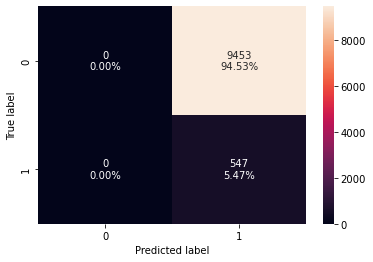

<IPython.core.display.Javascript object>

In [48]:
# Creating the confusion matrix for the validation dataset
confusion_matrix_sklearn(tuned_bag2, X_val, y_val)

#### Observations:
* The best parameters found by the randomizedsearchCV for the Bagging model with oversampled were {'n_estimators': 50, 'max_samples': 1, 'max_features': 0.7} with CV score=1.0:
* The computing time was: 34min 23s
* the recall metric remained the same in both the training set and the validation set with 100% so minimizing the fullest of the False Negatives. However, despite the fact that we are mainly maximizing the recall, we can see how the decrease in the other metrics was very significant, all decreasing by more than 45% in the validation test, which suggests that we should look for an option with a better general balanced between the different metrics.
* In general, the other metrics such as Accuracy dropped by ~ 45%, the Precision metric dropped by ~ 45% and the F1 score by ~ 55% in the validation set compared to their performance in the training set.
* The True Negatives represent the 0%, the True Positives the 5.47%, and the False Positives the 94.53%(increasing the amount of money associated to inspection cost) in the validation dataset.

### Sample Tuning method for Random forest with oversampled data

In [49]:
%%time 

# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)}


#Calling RandomizedSearchCV to find the best parameters
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over) ## Complete the code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 300, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.9792313117066291:
Wall time: 25min 31s


<IPython.core.display.Javascript object>

In [51]:
# Creating new pipeline with best parameters
tuned_rf2 = RandomForestClassifier(
    max_features="sqrt",
    random_state=1,
    max_samples=0.6,
    n_estimators=300,
    min_samples_leaf=1,
)
# Fitting the model with the oversampled data
tuned_rf2.fit(
    X_train_over, y_train_over
) 

RandomForestClassifier(max_features='sqrt', max_samples=0.6, n_estimators=300,
                       random_state=1)

<IPython.core.display.Javascript object>

In [52]:
# Checking the model's performance with the oversampled training dataset
rf2_train_perf = model_performance_classification_sklearn(
    tuned_rf2, X_train_over, y_train_over
)  
rf2_train_perf

Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

<IPython.core.display.Javascript object>

In [53]:
# Checking the model's performance on the validation dataset
rf2_val_perf = model_performance_classification_sklearn(
    tuned_rf2, X_val, y_val
)  
rf2_val_perf

Accuracy  Recall  Precision    F1
0     0.990   0.887      0.927 0.907

<IPython.core.display.Javascript object>

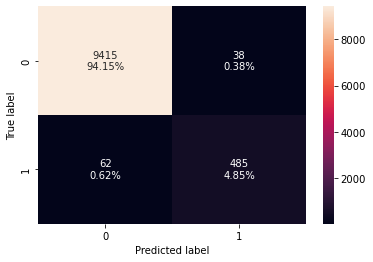

<IPython.core.display.Javascript object>

In [54]:
# Creating the confusion matrix with the validation dataset
confusion_matrix_sklearn(tuned_rf2, X_val, y_val)

#### Observations:
* The best parameters found by the randomizedsearchCV for the Random Forest model with oversampled were {'n_estimators': 300, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.9792313117066291:
* The computing time was: 25min 31s
* The recall metric evidently changed from 100% in the training set to 88% in the validation set, which suggests a small overfitting in the training set for the Random Forest model. We can see that the model did not completely minimize the False negatives. However, these represent a fairly low percentage at 0.62%.
* The True Negatives represent the 94.15%, the True Positives the 4.85%, and the False Positives the 0.38% in the validation dataset.
* In general, the other metrics such as Accuracy dropped just around ~ 1%, the Precision metric dropped by ~ 8% and the F1 score by ~ 10% in the validation set compared to their performance in the training set.

### Sample Tuning method for Gradient Boosting with oversampled data

In [56]:
%%time 

# defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid={"n_estimators": np.arange(100,150,25), "learning_rate": [0.2, 0.05, 1], "subsample":[0.5,0.7], "max_features":[0.5,0.7]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, scoring=scorer, n_iter=50, n_jobs = -1, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.7, 'learning_rate': 1} with CV score=0.9584626234132582:
Wall time: 15min 9s


<IPython.core.display.Javascript object>

In [57]:
# Creating new pipeline with best parameters  #param_grid = { "n_estimators": np.arange(100,150,25), "learning_rate": [0.2, 0.05, 1], "subsample":[0.5,0.7], "max_features":[0.5,0.7] }
tuned_gbm = GradientBoostingClassifier(
    max_features=0.7,
    subsample=0.7,
    n_estimators=125,
    learning_rate=1,
)

tuned_gbm.fit(X_train_over, y_train_over)

GradientBoostingClassifier(learning_rate=1, max_features=0.7, n_estimators=125,
                           subsample=0.7)

<IPython.core.display.Javascript object>

In [58]:
# Checking the model's performance with the oversampled training dataset
gbm_train_perf = model_performance_classification_sklearn(
    tuned_gbm, X_train_over, y_train_over
)
gbm_train_perf

Accuracy  Recall  Precision    F1
0     0.981   0.977      0.985 0.981

<IPython.core.display.Javascript object>

In [59]:
# Checking the model's performance with the oversampled validation dataset
gbm_val_perf = model_performance_classification_sklearn(tuned_gbm, X_val, y_val)
gbm_val_perf

Accuracy  Recall  Precision    F1
0     0.964   0.881      0.620 0.728

<IPython.core.display.Javascript object>

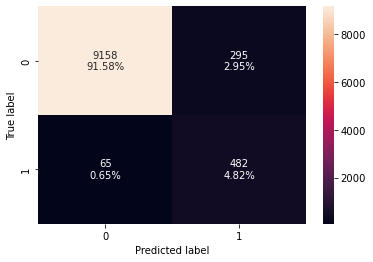

<IPython.core.display.Javascript object>

In [60]:
# Creating the confusion matrix for the validation dataset
confusion_matrix_sklearn(tuned_gbm, X_val, y_val)

#### Observations:
* The best parameters found by the randomizedsearchCV for the Gradient Boosting model with oversampled were {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.7, 'learning_rate': 1} with CV score=0.9584626234132582:
* The computing time was: 15min 9s
* The recall metric evidently changed from 100% in the training set to 88% in the validation set, which suggests a small overfitting in the training set for the Gradient Boost model. We can see that the model did not completely minimize the False negatives. However, these represent a fairly low percentage at 0.65%.
* The True Negatives represent the 91.58%, the True Positives the 4.82%, and the False Positives the 2.95% in the validation dataset, which represents a good general performance.
* In general, the other metrics such as Accuracy dropped just around ~ 2%, the Precision metric dropped by ~ 35% and the F1 score by ~ 25% in the validation set compared to their performance in the training set.

### Sample Tuning method for XGBoost with oversampled data

In [62]:
%%time 

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':[150,200,250],'scale_pos_weight':[5,10], 'learning_rate':[0.1,0.2], 'gamma':[0,3,5], 'subsample':[0.8,0.9]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over) ## Complete the code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.8, 'scale_pos_weight': 10, 'n_estimators': 250, 'learning_rate': 0.1, 'gamma': 0} with CV score=0.9962976022566996:
Wall time: 3h 25min 35s


<IPython.core.display.Javascript object>

In [63]:
# Creating the new pipeline with best parameters
xgb2 = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.8,
    scale_pos_weight=10,
    n_estimators=250,
    learning_rate=0.1,
    gamma=0,
)
# Fitting the model with the oversampled training dataset
xgb2.fit(
    X_train_over, y_train_over
)  

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=250, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=10, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [64]:
# Check the model's performance with the oversampled training dataset
xgb2_train_perf = model_performance_classification_sklearn(
    xgb2, X_train_over, y_train_over
)  
xgb2_train_perf

Accuracy  Recall  Precision    F1
0     0.996   1.000      0.991 0.996

<IPython.core.display.Javascript object>

In [65]:
# Check the model's performance with the oversampled validation dataset
xgb2_val_perf = model_performance_classification_sklearn(
    xgb2, X_val, y_val
)
xgb2_val_perf

Accuracy  Recall  Precision    F1
0     0.975   0.909      0.716 0.801

<IPython.core.display.Javascript object>

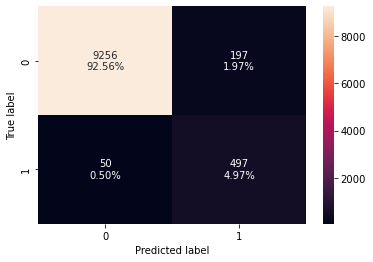

<IPython.core.display.Javascript object>

In [66]:
# Creating the confusion matrix for the validation dataset
confusion_matrix_sklearn(xgb2, X_val, y_val)

#### Observations:
* The best parameters found by the randomizedsearchCV for the XGBoost model with oversampled were {'subsample': 0.8, 'scale_pos_weight': 10, 'n_estimators': 250, 'learning_rate': 0.1, 'gamma': 0} with CV score=0.9962976022566996:
* The computing time was: 3h 25min 35s
* The recall metric changed from 100% in the training set to 90% in the validation set, which suggests a  good performance for the XGBoost model. Even though, the model did not completely minimize the False negatives, 0.50% represents a fairly low percentage, which is really good. Additionally, the True Negatives represent the 92.56%, the True Positives the 4.97%, and the False Positives just the 1.97% in the validation dataset, which represents the best general performance among all the models previously performed.
* In general, the other metrics such as Accuracy dropped just around ~ 3%, the Precision metric dropped by ~ 28% and the F1 score by ~ 20% in the validation set compared to their performance in the training set.

## Model Performance comparison

#### * Now based on the model comparison we should pick the best model for the production stage.

In [77]:
# Comparing the training performance of each model 
models_train_comp_df = pd.concat(
    [
        rf2_train_perf.T,
        bag2_train_perf.T,
        gbm_train_perf.T,
        xgb2_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Random forest with hyperparameters & oversampled data",
    "Bagging classifier with hyperparameters & oversampled data",
    "Gradient Boosting with hyperparameters & oversampled data",
    "XGBoost with hyperparameters & oversampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Random forest with hyperparameters & oversampled data  \
Accuracy                                               1.000       
Recall                                                 1.000       
Precision                                              1.000       
F1                                                     1.000       

           Bagging classifier with hyperparameters & oversampled data  \
Accuracy                                               0.500            
Recall                                                 1.000            
Precision                                              0.500            
F1                                                     0.667            

           Gradient Boosting with hyperparameters & oversampled data  \
Accuracy                                               0.981           
Recall                                                 0.977           
Precision                                              0.985           
F1                                                     0.981           

           XGBoost with hyperparameters & oversampled data  
Accuracy                                             0.996  
Recall                                               1.000  
Precision                                            0.991  
F1                                                   0.996

<IPython.core.display.Javascript object>

In [78]:
# Comparing the validation performance for each model 
models_val_comp_df = pd.concat(
    [
        rf2_val_perf.T,
        bag2_val_perf.T,
        gbm_val_perf.T,
        xgb2_val_perf.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Random forest with hyperparameters & oversampled data",
    "Bagging classifier with hyperparameters & oversampled data",
    "Gradient Boosting with hyperparameters & oversampled data",
    "XGBoost with hyperparameters & oversampled data",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


Random forest with hyperparameters & oversampled data  \
Accuracy                                               0.990       
Recall                                                 0.887       
Precision                                              0.927       
F1                                                     0.907       

           Bagging classifier with hyperparameters & oversampled data  \
Accuracy                                               0.055            
Recall                                                 1.000            
Precision                                              0.055            
F1                                                     0.104            

           Gradient Boosting with hyperparameters & oversampled data  \
Accuracy                                               0.964           
Recall                                                 0.881           
Precision                                              0.620           
F1                                                     0.728           

           XGBoost with hyperparameters & oversampled data  
Accuracy                                             0.975  
Recall                                               0.909  
Precision                                            0.716  
F1                                                   0.801

<IPython.core.display.Javascript object>

#### Observations:
* Comparing all hyperparameters tuned with oversampled models we can see that the Random Forest was overfitting on the training dataset, losing a little the capacity to maximize the Recall metric in the validation dataset.
* Even though we are looking to maximize the Recall to reduce the False Negatives, we can see a fairly balanced overall performance in the other metrics for the Random Forest model, such as: Accuracy dropped just around ~ 1%, the Precision metric dropped by ~ 8% and the F1 Score by ~ 10% in the validation set compared to their performance in the training set.
* The Bagging Classifier maximized the Recall to the fullest in both training and validation dataset. However, the other metrics such as Accuracy dropped by ~ 45%, the Precision metric dropped by ~ 45% and the F1 score by ~ 55% in the validation set compared to their performance in the training set, which suggests that we should look for an option with a better general balanced between the different metrics. Additionally, the False Positives were around 94.53%  in the validation dataset(this might increase the amount of money associated to the inspection cost).
* The Gradient Boost model maximized the recall metric to the fullest in the training dataset, then dropped from 100% to 88% in the validation dataset, which suggests a small overfitting over the training dataset.  The Gradient Boost model has a good general performance. The other metrics such as Accuracy dropped just around ~ 2%, the Precision metric dropped by ~ 35% and the F1 score by ~ 25% in the validation set compared to their performance in the training set. However, we have to evaluate the last option, the XGBoost model to decide.
* The Recall metric changed from 100% in the training set to 90% in the validation set, which suggests a  really good performance for the XGBoost model at minimizing the False Negatives. Even though, the model did not completely minimize the False negatives, 0.50% represents a fairly low percentage, which is really good. Additionally, the True Negatives represent the 92.56%, the True Positives the 4.97%, and the False Positives just the 1.97% in the validation dataset, which represents the best general performance among all the models previously performed. Additionally, the other metrics such as Accuracy dropped just around ~ 3%, the Precision metric dropped by ~ 28% and the F1 score by ~ 20% in the validation set compared to their performance in the training set. So based on the maximization of the Recall metric, the general good performance against the other models, and given the mathematical robustness of the algorithm and the good reputation for bringing it to production, XGBoost will be the option used in this project to measure performance on the test dataset.

#### Let's evaluate the performance of our model on unseen test data.

In [68]:
# Obtaining the diverse metrics on the test dataset with XGBoost model
xgboost_grid_test = model_performance_classification_sklearn(xgb2, X_test, y_test)
print("Test performance:")
xgboost_grid_test

Test performance:


Accuracy  Recall  Precision    F1
0     0.972   0.879      0.692 0.775

<IPython.core.display.Javascript object>

#### Observations:
* Comparing the recall metric obtained through the validation performance with the XGBoost oversampled model, with that obtained in the performance of the test dataset, we can see a slight drop of 2%, however it represents a fairly good indicator in the maximization of recall and the minimization of false positives.
* In general, we see that the Accuracy metric remained practically the same in the test dataset, while the precision and the F1 score fell between 2-3% with respect to the performance obtained in the XGBoost model with oversampled for the validation dataset.
* So 88% is representing a very high True Positive Rate for this model, which is really good for our purposes.

### Feature Importances

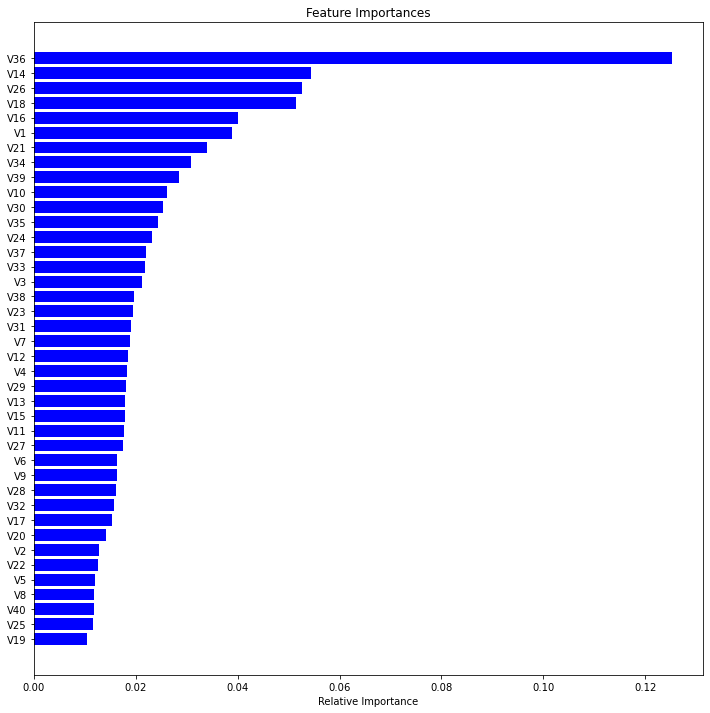

<IPython.core.display.Javascript object>

In [69]:
# Checking the feature importance for the XGBoost model
feature_names = X_train.columns
importances = (
    xgb2.feature_importances_
)  
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="blue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Observations:
* According to the Feature Importances graph, the first 10 features are as follow: 
 * 1.-Variable V36
 * 2.-Variable V14
 * 3.-Variable V26
 * 4.-Variable V18 
 * 5.-Variable V16
 * 6.-Variable V1
 * 7.-Variable V21
 * 8.-Variable V34
 * 9.-Variable V39 
 * 10.-Variable V10
* This was used to rethink the EDA and specifically look for the relationships between the most important variables, through the use of scatter and strip plots, in order to characterize the most likely zones of failure regarding to each of these 10 variables.

## Pipelines to build the final model

In [80]:
# Taken from MLS2 standardized
# pipeline takes a list of tuples as parameter. The last entry is the call to the modeling algorithm
#  We shouldn't use the column transformer because we have just one datatype in the dataset
Model = Pipeline(
    [
        (
            "XBG2",
            XGBClassifier(
                random_state=1,
                n_estimators=250,
                scale_pos_weight=10,
                subsample=0.8,
                learning_rate=0.1,
                gamma=0,
                eval_metric="logloss",
            ),
        ), 
    ]
)

<IPython.core.display.Javascript object>

Best parameters are {'subsample': 0.8, 'scale_pos_weight': 10, 'n_estimators': 250, 'learning_rate': 0.1, 'gamma': 0} with CV score=0.9962976022566996:
Wall time: 3h 25min 35s

In [81]:
# Separating the target variable and other variables
X1 = data.drop(columns="Target")
Y1 = data["Target"]

# dropping the target variable from the test dataset
X_test1 = df_test.drop(columns="Target") 
# Storing the target variable within y_test1
y_test1 = df_test.Target 


<IPython.core.display.Javascript object>

In [82]:
# Treating the missing values in the training dataset
imputer = SimpleImputer(strategy="median")
X1 = imputer.fit_transform(X1)

# Treating the missing values in the test dataset with its own median
X2 = imputer.fit_transform(
    X_test1
) 

<IPython.core.display.Javascript object>

In [83]:
# SMOTE Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_over1, y_over1 = sm.fit_resample(X1, Y1)

<IPython.core.display.Javascript object>

In [84]:
# Fitting the Model obtained from above step
Model.fit(X_over1, y_over1)

Pipeline(steps=[('XBG2',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               eval_metric='logloss', gamma=0, gpu_id=-1,
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.1, max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=250,
                               n_jobs=8, num_parallel_tree=1, predictor='auto',
                               random_state=1, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=10, subsample=0.8,
                               tree_method='exact', validate_parameters=1,
                               verbosity=None))])

<IPython.core.display.Javascript object>

In [75]:
# Production model using the test dataset
Model.predict(
    X2
)  

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

<IPython.core.display.Javascript object>

In [86]:
# Making predictions on the test dataset with the productionized model
%%time
X_test1["Target"] = y_test1
X_test1["Target_pred"] = Model.predict(X2)

Wall time: 23.5 ms


<IPython.core.display.Javascript object>

In [88]:
# Comparing the actual values against the predicted values through the productionized model
X_test1[["Target", "Target_pred"]].sample(200, random_state=2)

Target  Target_pred
7878       0            0
3224       0            0
1919       1            1
4432       0            0
4835       0            0
4895       0            0
7269       0            0
1451       0            0
1742       0            0
4628       0            0
7053       0            0
3634       0            0
3215       0            0
3707       0            0
7066       0            0
2965       0            0
8644       0            0
6469       0            1
8921       0            0
1254       0            0
7356       0            0
180        0            0
2167       0            0
5975       0            0
2105       0            0
7054       1            1
6145       0            0
2929       0            0
5460       0            0
6810       0            0
8500       0            0
801        0            0
2024       0            0
1345       0            0
3279       1            0
554        0            0
946        0            0
5165       0            0
1906       0            0
1713       0            0
1297       0            0
4588       0            0
4236       0            0
338        0            0
2628       0            0
3340       0            0
7570       0            0
1810       0            0
127        0            0
3709       0            0
6067       0            0
9117       0            0
7941       0            0
7013       0            0
7521       0            0
975        0            0
5286       0            0
301        0            0
400        0            0
1278       0            0
8131       0            0
9253       0            0
8256       0            0
9561       1            1
5844       0            0
1371       0            0
1189       0            0
2207       0            0
2113       0            0
7023       0            0
7650       0            0
7931       0            0
9288       0            1
4072       0            0
2877       0            1
617        0            1
7948       0            0
2942       0            0
1219       0            0
4801       0            0
5097       0            0
8433       0            0
9721       0            0
1800       0            0
9355       0            0
4140       0            0
1367       0            0
5425       0            0
110        0            0
4854       0            0
1339       0            0
8482       0            0
7542       0            0
749        0            0
2245       0            0
8223       0            0
7145       0            0
7062       0            0
6329       0            0
6632       0            0
616        0            1
1751       0            0
3230       0            0
9460       0            0
3901       0            0
1496       0            0
1282       0            0
7016       0            0
9057       0            0
8135       0            0
8686       1            1
793        0            0
8881       0            0
188        0            0
2427       0            0
3307       0            0
7509       0            0
5199       0            0
6313       0            0
5218       0            0
3343       0            0
9572       0            0
2750       0            0
6762       0            0
3704       0            0
3416       0            0
2352       0            0
5521       0            0
1446       0            0
6873       0            0
5130       0            0
8767       0            0
2018       1            1
3227       0            0
2140       0            0
4161       0            0
2596       0            0
6084       0            0
7781       0            0
3938       0            0
1460       0            0
6574       0            0
659        0            0
1568       0            0
8581       0            0
8480       0            0
4220       0            0
213        0            0
791        0            0
740        0            0
6784       1            1
7576       0            0
184        1            1
73

<IPython.core.display.Javascript object>

In [85]:
Model_test1 = model_performance_classification_sklearn(Model, X_test1, y_test1)
Model_test1

Accuracy  Recall  Precision    F1
0     0.967   0.883      0.644 0.745

<IPython.core.display.Javascript object>

#### Observations:
* Comparing the obtained Recall through the performance with test data during the training with the XGBoost model, we can see that we had a 87.9% while the performance with the test data with the Pipeline production was slightly better with 88.3%.
* Looking at the general performance of the other metrics, we can observe that Accuracy, the Precision and the F1 Score decreased their performance with the production Pipeline.

# Business Insights and Conclusions


* We received a train and test datasets. The training dataset was splitted in two parts, Training and validation to prevent data leak. 
* We observed that the most of the variables have a simmetrical or normal distribution or skewness equal to zero, some of the variables have a little positive (+) skewness, and some of them a little negative(-) skewness. The kurtosis on all the variables tends to be positive(+) or Leptokurtic. Because of this we did not consider necessary to scale the data.
* The percentual weight of the target class in the training and test dataset was 94.5% for the class "0" or "no Failure", and 5.5% for the class "1" or "Failure".
* From the importance features graph, we determined the 10 most important variables to rethink the EDA and establish the strongest correlations between the variables according to Pearson's coefficient, and get a better understanding of the relationships in this project between these variables. The stongest correlations are as follow:
  * V36 vs V14 = + 0.55
  * V36 vs V18 = + 0.35
  * V36 vs V39 = + 0.75
  * V36 vs V10 = + 0.56
  * V14 vs V26 = - 0.67
  * V26 vs V16 = - 0.43
  * V26 vs V34 = - 0.46
  * V18 vs V36 = + 0.35
  * V18 vs V34 = - 0.61
  * V16 vs V21 = + 0.83
  * V1 vs V18 =  - 0.39
  * V1 vs V21 =  - 0.39
  * V10 vs V34 = + 0.51
  * V10 vs V39 = + 0.57
* Many of the graphs showed very well defined and bounded fault zones, which could be characterized and ranked in later stages of this project. However, we would need to know the actual names and units of the variables to perform a more precise statistical analysis.
 * We observed a positive correlation (+ 0.55) between the variables V36 and V14. Also, we can stablish cutoffs related to the most evident failure zone according to these 2 variables are, for V36 from -8 to 5 units & for V14 from -2 to 5 units approximately.
 * We could observe a positive correlation (+ 0.35) between the variables V36 and V18. The cutoffs related to the most evident failure zone according to these 2 variables are, for V36 from -8 to 0 units & for V18 from -12 to -2 units approximately.
 * We can observed a strong positive correlation (+ 0.75) between the variablesV36 and V39. The cutoffs related to the most evident failure zone according to these 2 variables are, for V36 from -8 to 5 units & for V39 from -6 to 3 units approximately. the variance in the failure zone is wider and disperse for the V39 variable.
 * We can observe a positive correlation (+ 0.56) between the variables V36 and V10. The cutoffs related to the most evident failure zone according to these 2 variables are, for V36 from -8 to 2 units & for V10, we can see two cluster, the first one from -7.5 to -2.5 units approximately, and the second one from 0 to 5 units approximately.
 * We saw a negative correlation (-0.67) between the variables V14 and V26. The cutoffs related to the most evident failure zone according to these 2 variables are not as evident as we could observe in the previuos graphs. Although, it Seems to show the major concentration of failure points between 1 and 5 for V14, and from -10 to -2 for V26.
 * We could observe a negative correlation (-0.43) between the variables V26 and V16. The cutoffs related to the most evident failure zone according to these 2 variables are, for V26 from -10 to 2 units & for V16 from 5 to 13 units approximately.
 * There is a negative correlation (-0.46) between the variables V18 and V34. The cutoffs related to the most evident failure zone according to these 2 variables are very disperse in contrast to the other variables.
 * There is a negative correlation (-0.61) between the variables V18 and V34. The cutoffs related to the most evident failure zone according to these 2 variables are, for V18 from -12 to -3 units & for V34 from 0 to 10 units approximately. The critical zone is restricted to upper left quadrant of the graph in a well defined zone.
 * The strongest positive correlation (+ 0.83) occurs between the variables V21 and V16. The cutoffs related to the most evident failure zone according to these 2 variables are, for V21 from 5 to 12 units & for V16 from 2 to 10 units approximately. the variance in the failure zone is wider and disperse for the variable V16.
 * We could observe a negative correlation (- 0.39) between the variables V1 and V18. The cutoffs related to the most evident failure zone according to these 2 variables are, for V1 from -5 to 8 units & for V18 from -12 to -4 units approximately. The variance in the failure zone is wider and disperse for the V1 variable.
 * There is a negative correlation (- 0.39) between the variables V1 and V21. The cutoffs related to the most evident failure zone according to these 2 variables are, for V1 from -5 to 8 units & for V18 from 0 to 10 units approximately. The variance in the failure zone is wider and disperse for the V1 variable.
 * We can observe a positive correlation (+ 0.51) between the variables V10 and V34. The cutoffs related to the most evident failure zone according to these 2 variables are, for V10 from -7 to 0 units & for V34 from 2 to 8 units approximately. the variance in the failure zone is wider and disperse for the variable V10.
 * There is a positive correlation (+ 0.57) between the variables V10 and V39. The cutoffs related to the most evident failure zone according to these 2 variables are, for V10 from -2.5 to 4 units & for V39 from -5 to -1 units approximately. The variance in the failure zone is wider and disperse for the variable V10.
 * As we can see from the strip plots, the variance in the fault zone is lower for the variables V36 and V34, which would serve as good discretization factors when characterizing the various failure families in future stages of this project.
* The variables V34 y V18 represent represent the best graph for visualization and discretization of the range of fault zones. With this, in a future study, alerts could be created according to those fault zones characterized from the graphs and define which ones correspond to equipment replacement, repair or just inspection.
* We had to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model so we picked the Recall to be maximized since as greater the Recall, the higher the chances of minimizing false negatives.
* We wanted to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.
* Comparing all hyperparameters tuned with oversampled models we can see that the Random Forest was overfitting on the training dataset, losing a little the capacity to maximize the Recall metric in the validation dataset. Even though we were looking to maximize the Recall and reduce the False Negatives, we observed a fairly balanced overall performance in the other metrics for the Random Forest model, such as: Accuracy dropped just around ~ 1%, the Precision metric dropped by ~ 8% and the F1 Score by ~ 10% in the validation set compared to their performance in the training set.
* The Bagging Classifier maximized the Recall to the fullest in both training and validation dataset. However, the other metrics such as Accuracy dropped by ~ 45%, the Precision metric dropped by ~ 45% and the F1 score by ~ 55% in the validation set compared to their performance in the training set, so we preferred an option with a better general balance. Additionally, the False Positives were around 94.53%  in the validation dataset(this might increase the amount of money associated to the inspection cost).
* The Gradient Boost model maximized the recall metric to the fullest in the training dataset, then dropped from 100% to 88% in the validation dataset, which suggests a slight overfitting over the training dataset.  The Gradient Boost model has a good general performance. The other metrics such as Accuracy dropped just around ~ 2%, the Precision metric dropped by ~ 35% and the F1 score by ~ 25% in the validation set compared to their performance in the training set.
* The XGBoost model maximized the Recall metric to 100% in the training set and dropping to 90% in the validation set, which suggests a really good performance for the XGBoost model at minimizing the False Negatives. Even though, the model did not completely minimize the False negatives, 0.50% represents a fairly low percentage, which is really good. Additionally, the True Negatives represent the 92.56%, the True Positives the 4.97%, and the False Positives just the 1.97% in the validation dataset, which represented the best general performance among all the models previously performed. Additionally, the other metrics such as Accuracy dropped just around ~ 3%, the Precision metric dropped by ~ 28% and the F1 score by ~ 20% in the validation set compared to their performance in the training set. So based on the maximization of the Recall metric, the general good performance against the other models, and given the mathematical robustness of the algorithm and the good reputation for bringing it to production, XGBoost was the option used in this project to measure the performance on the test dataset.
* When we compared the obtained Recall through the performance with test data during the training with the XGBoost model, we could see that we had a 87.9% while the performance with the test data with the Pipeline production was slightly better with 88.3%. Looking at the general performance of the other metrics, we can observe that Accuracy, the Precision and the F1 Score decreased their performance as well with the production Pipeline.
* Pipeline model is capable of predicting with 88% of accuracy the failures (TN). This means that the model has robust performance with unseen dataset.
* Implementing the Tuned XGBoost oversampled model we would be saving between 20-25% of the costs associated with replacement, repair and inspection with respect to the use of the Random Forest and Gradient boost models.
* Through the use of pipelines we are reducing computational time by 4 times and, in turn, we would be reducing the costs associated with this in case of facing issues or situations that involve the processing of big data. 

***